# <h1><center>**`Employee Attrition Problem`**</center></h1>

### `Dataset Desciption`

The dataset folder contains the following files:

**train_dataset.csv** = 1000000 x 8

**train_salaries.csv** = 1000000 x 2

**test_dataset.csv** =  1000000 x 8

Columns Provided in the Dataset

1. **jobId** - Unique ID that indicates the employee
2. **companyId** - Unique ID that idicates the company
3. **jobType** - Shows which post the employee is working for the company
4. **degree** - shows which degree is completed by the employee
5. **major** - shows the field in which the employee is specialised in
6. **industry** - show the industry in which the employee is working
7. **yearsExperience** - years of working experience the employee is having
8. **milesFromMetropolis** - distance in miles between the comapny and his house
9. **salary** - salary given to the employee.
eg. 250 indicates 2,50,000 in dollars

In [1]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from tqdm import tqdm

In [2]:
# upload data in your drive and then run this
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the train_dataset, train_salaries, test_dataset(pass your file path from drive)

train_data = pd.read_csv('/content/drive/MyDrive/dataset/ML-PROJECTS/EMPLOYEE_ATTRITION_P1/train_dataset.csv')
train_data_salaries =pd.read_csv('/content/drive/MyDrive/dataset/ML-PROJECTS/EMPLOYEE_ATTRITION_P1/train_salaries.csv')
test_data = pd.read_csv('/content/drive/MyDrive/dataset/ML-PROJECTS/EMPLOYEE_ATTRITION_P1/test_dataset.csv')

In [4]:

print('Train data shape:',train_data.shape)
print('Train data salaries data:',train_data_salaries.shape)
print('Test data shape:',test_data.shape)

Train data shape: (1000000, 8)
Train data salaries data: (1000000, 2)
Test data shape: (1000000, 8)


In [5]:
# check the train data
train_data.head()


jobId companyId         jobType       degree      major  \
0  JOB1362684407687    COMP37             CFO      MASTERS       MATH   
1  JOB1362684407688    COMP19             CEO  HIGH_SCHOOL       NONE   
2  JOB1362684407689    COMP52  VICE_PRESIDENT     DOCTORAL    PHYSICS   
3  JOB1362684407690    COMP38         MANAGER     DOCTORAL  CHEMISTRY   
4  JOB1362684407691     COMP7  VICE_PRESIDENT    BACHELORS    PHYSICS   

  industry  yearsExperience  milesFromMetropolis  
0   HEALTH               10                   83  
1      WEB                3                   73  
2   HEALTH               10                   38  
3     AUTO                8                   17  
4  FINANCE                8                   16

In [6]:
# check the train data salarie
train_data_salaries.head()

jobId  salary
0  JOB1362684407687     130
1  JOB1362684407688     101
2  JOB1362684407689     137
3  JOB1362684407690     142
4  JOB1362684407691     163

In [7]:
# check the test data
test_data.head()


jobId companyId  jobType       degree    major industry  \
0  JOB1362685407687    COMP33  MANAGER  HIGH_SCHOOL     NONE   HEALTH   
1  JOB1362685407688    COMP13   JUNIOR         NONE     NONE     AUTO   
2  JOB1362685407689    COMP10      CTO      MASTERS  BIOLOGY   HEALTH   
3  JOB1362685407690    COMP21  MANAGER  HIGH_SCHOOL     NONE      OIL   
4  JOB1362685407691    COMP36   JUNIOR     DOCTORAL  BIOLOGY      OIL   

   yearsExperience  milesFromMetropolis  
0               22                   73  
1               20                   47  
2               17                    9  
3               14                   96  
4               10                   44

In [8]:
# Adding salary data to train_dataset using merge on jobId
train_data = train_data.merge(train_data_salaries, on='jobId')

train_data.head()

jobId companyId         jobType       degree      major  \
0  JOB1362684407687    COMP37             CFO      MASTERS       MATH   
1  JOB1362684407688    COMP19             CEO  HIGH_SCHOOL       NONE   
2  JOB1362684407689    COMP52  VICE_PRESIDENT     DOCTORAL    PHYSICS   
3  JOB1362684407690    COMP38         MANAGER     DOCTORAL  CHEMISTRY   
4  JOB1362684407691     COMP7  VICE_PRESIDENT    BACHELORS    PHYSICS   

  industry  yearsExperience  milesFromMetropolis  salary  
0   HEALTH               10                   83     130  
1      WEB                3                   73     101  
2   HEALTH               10                   38     137  
3     AUTO                8                   17     142  
4  FINANCE                8                   16     163

In [9]:
#salaries less that 30 can be removed as such a such salary per month is not expected
train_data = train_data[train_data['salary'] > 30]
train_data

jobId companyId         jobType       degree      major  \
0       JOB1362684407687    COMP37             CFO      MASTERS       MATH   
1       JOB1362684407688    COMP19             CEO  HIGH_SCHOOL       NONE   
2       JOB1362684407689    COMP52  VICE_PRESIDENT     DOCTORAL    PHYSICS   
3       JOB1362684407690    COMP38         MANAGER     DOCTORAL  CHEMISTRY   
4       JOB1362684407691     COMP7  VICE_PRESIDENT    BACHELORS    PHYSICS   
...                  ...       ...             ...          ...        ...   
999995  JOB1362685407682    COMP56  VICE_PRESIDENT    BACHELORS  CHEMISTRY   
999996  JOB1362685407683    COMP24             CTO  HIGH_SCHOOL       NONE   
999997  JOB1362685407684    COMP23          JUNIOR  HIGH_SCHOOL       NONE   
999998  JOB1362685407685     COMP3             CFO      MASTERS       NONE   
999999  JOB1362685407686    COMP59          JUNIOR    BACHELORS       NONE   

         industry  yearsExperience  milesFromMetropolis  salary  
0          HEALTH               10                   83     130  
1             WEB                3                   73     101  
2          HEALTH               10                   38     137  
3            AUTO                8                   17     142  
4         FINANCE                8                   16     163  
...           ...              ...                  ...     ...  
999995     HEALTH               19                   94      88  
999996    FINANCE               12                   35     160  
999997  EDUCATION               16                   81      64  
999998     HEALTH                6                    5     149  
999999  EDUCATION               20                   11      88  

[997548 rows x 9 columns]

# Basic EDA

## Identifying the number of features or columns

## Know all the names of the columns¶

In [10]:
# get all column names
train_data.columns


Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary'],
      dtype='object')

## Knows more about the data in the columns like data type it contains and total samples of each

In [11]:
# Check which columns are having categorical, numerical or boolean values of train_dataset

train_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 997548 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   jobId                997548 non-null  object
 1   companyId            997548 non-null  object
 2   jobType              997548 non-null  object
 3   degree               997548 non-null  object
 4   major                997548 non-null  object
 5   industry             997548 non-null  object
 6   yearsExperience      997548 non-null  int64 
 7   milesFromMetropolis  997548 non-null  int64 
 8   salary               997548 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.1+ MB


In [12]:
# Check which columns are having categorical, numerical or boolean values of test_dataset

test_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


1. After checking the Dtypes of all the columns
    1. object - String values
    1. int64 - Numerical values
1. There are more String values than the numerical values in the dataset

## Know more mathematical relations of the dataset like count, min, max values, standarad deviation values, mean and different percentile values

In [13]:
# For train_dataset
# For more information on the dataset like the total count in all the columns
# min, max values and more information of the respective columns
train_data.describe()



yearsExperience  milesFromMetropolis         salary
count    997548.000000        997548.000000  997548.000000
mean         12.015214            49.458372     116.280462
std           7.204992            28.863518      38.512936
min           0.000000             0.000000      31.000000
25%           6.000000            24.000000      89.000000
50%          12.000000            49.000000     114.000000
75%          18.000000            74.000000     141.000000
max          24.000000            99.000000     301.000000

In [14]:
# for test_dataset
# For more information on the dataset like the total count in all the columns
# min, max values and more information of the respective columns

test_data.describe()


yearsExperience  milesFromMetropolis
count   1000000.000000       1000000.000000
mean         12.002104            49.526414
std           7.213179            28.889713
min           0.000000             0.000000
25%           6.000000            25.000000
50%          12.000000            50.000000
75%          18.000000            75.000000
max          24.000000            99.000000

## Get the total number of samples in the dataset using the len() function

In [15]:
# len of train and test dataset
print('Length of Train_data:',len(train_data))
print('Length of Test_data:',len(test_data))


Length of Train_data: 997548
Length of Test_data: 1000000


## Get unique values

In [16]:
# get how many unique values are in train_dataset

#train_data.nunique()
for i in train_data.columns:
  print(i,':',len(train_data[i].unique()))


jobId : 997548
companyId : 63
jobType : 8
degree : 5
major : 9
industry : 7
yearsExperience : 25
milesFromMetropolis : 100
salary : 265


In [17]:
# get how many unique values are in test_dataset

for i in test_data.columns:
  print(i,':', test_data[i].nunique())

jobId : 1000000
companyId : 63
jobType : 8
degree : 5
major : 9
industry : 7
yearsExperience : 25
milesFromMetropolis : 100


## Counting the total number of missing values¶

In [18]:
# Check for missing values in all the columnns of the train_dataset
#train_data.isna().sum()
for i in train_data.columns:
  print(i, ':', train_data[i].isna().sum())


jobId : 0
companyId : 0
jobType : 0
degree : 0
major : 0
industry : 0
yearsExperience : 0
milesFromMetropolis : 0
salary : 0


In [19]:
 # Check for missing values in all the columnns of the test_dataset
test_data.isna().sum()


jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64

## By the observation gather from the train_data.info(), we can know there are no missing values in the train and test dataset

## removing 'jobId' and 'companyId' data from train and test data

In [20]:
print('Train_data columns:',len(train_data.columns))
print('Test_data columns:',len(test_data.columns))

Train_data columns: 9
Test_data columns: 8


In [21]:
# drop jobId and companyId from train_dataset
train_data = train_data.drop(columns=['jobId', 'companyId'], axis=1)

train_data.head()


jobType       degree      major industry  yearsExperience  \
0             CFO      MASTERS       MATH   HEALTH               10   
1             CEO  HIGH_SCHOOL       NONE      WEB                3   
2  VICE_PRESIDENT     DOCTORAL    PHYSICS   HEALTH               10   
3         MANAGER     DOCTORAL  CHEMISTRY     AUTO                8   
4  VICE_PRESIDENT    BACHELORS    PHYSICS  FINANCE                8   

   milesFromMetropolis  salary  
0                   83     130  
1                   73     101  
2                   38     137  
3                   17     142  
4                   16     163

In [22]:
# drop jobId and companyId from test_dataset
test_data = test_data.drop(columns=['jobId', 'companyId'], axis=1)
test_data.head()

jobType       degree    major industry  yearsExperience  \
0  MANAGER  HIGH_SCHOOL     NONE   HEALTH               22   
1   JUNIOR         NONE     NONE     AUTO               20   
2      CTO      MASTERS  BIOLOGY   HEALTH               17   
3  MANAGER  HIGH_SCHOOL     NONE      OIL               14   
4   JUNIOR     DOCTORAL  BIOLOGY      OIL               10   

   milesFromMetropolis  
0                   73  
1                   47  
2                    9  
3                   96  
4                   44

In [23]:
print(train_data['jobType'].unique())
train_data['jobType']. value_counts()

['CFO' 'CEO' 'VICE_PRESIDENT' 'MANAGER' 'JUNIOR' 'JANITOR' 'CTO' 'SENIOR']


SENIOR            125886
VICE_PRESIDENT    125234
MANAGER           125120
CTO               125045
CEO               124778
JUNIOR            124554
CFO               124369
JANITOR           122562
Name: jobType, dtype: int64

## Check for categorical columns in the dataset

By observing the train_data.info() cell, we can biforcate the datatype for which the object is the values which indicates those are the categorical columns. This dataset has more categorical columns than numerical values

1. jobType
2. degree
3. major
4. industry

In [24]:
# creating two empty list to store categorical column names and numerical column names respectively
categorical_list = []
var_list = []
# looping on whole dataset for geting list of categorical data column name
for i in train_data.columns:
  #print(train_data[i].dtype)
  if train_data[i].dtype == 'object':
    #print('yes')
    categorical_list.append(i)
  else:
    #print('no')
    var_list.append(i)


print(categorical_list)
print(var_list)

['jobType', 'degree', 'major', 'industry']
['yearsExperience', 'milesFromMetropolis', 'salary']


In [25]:
for c in categorical_list:
  print(f'{c}:,{train_data[c].unique()}')

jobType:,['CFO' 'CEO' 'VICE_PRESIDENT' 'MANAGER' 'JUNIOR' 'JANITOR' 'CTO' 'SENIOR']
degree:,['MASTERS' 'HIGH_SCHOOL' 'DOCTORAL' 'BACHELORS' 'NONE']
major:,['MATH' 'NONE' 'PHYSICS' 'CHEMISTRY' 'COMPSCI' 'BIOLOGY' 'LITERATURE'
 'BUSINESS' 'ENGINEERING']
industry:,['HEALTH' 'WEB' 'AUTO' 'FINANCE' 'EDUCATION' 'OIL' 'SERVICE']


## Correlation Matrix

## Why?
#### A correlation matrix is a table showing correlation coefficients between variables.

### There are three broad reasons for computing a correlation matrix:

  1. To summarize a large amount of data where the goal is to see patterns. In our example above, the observable pattern is that all the variables highly correlate with each other.
  2. To input into other analyses. For example, people commonly use correlation matrixes as inputs for exploratory factor analysis, confirmatory factor analysis, structural equation models, and linear regression when excluding missing values pairwise.
  3. As a diagnostic when checking other analyses. For example, with linear regression, a high amount of correlations suggests that the linear regression estimates will be unreliable.

In [26]:
# Correlation metrix using pandas
corr = train_data.corr()

corr.style.background_gradient(cmap='coolwarm').set_precision(2)

## From above correlation matrix:
1. yearsExperience and salary are positively correlated.

2. yearsExperience and milesFromMetropolis have no correlation.

3. milesFromMetropolis and salary are weakly negatively correlated.

[Text(0.5, 0, 'yearsExperience'),
 Text(1.5, 0, 'milesFromMetropolis'),
 Text(2.5, 0, 'salary')]

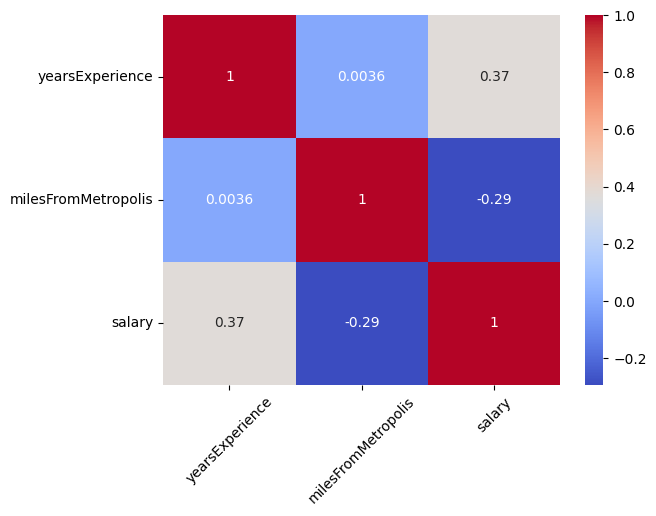

In [27]:
# Correlation metrix using seaborn
ax = sns.heatmap(train_data.corr(), cmap="coolwarm", annot=True, )
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)


## Chi-square Test



1. The Chi Square statistic is commonly used for testing relationships between categorical variables.

2. The null hypothesis of the Chi-Square test is that no relationship exists on the categorical variables in the population; they are independent.

3. Example: Is there any significant relationship between gender and education qualification?

4. The Chi-Square statistic is most commonly used to evaluate Tests of Independence when using a crosstabulation.

5. Crosstabulation presents the distributions of two categorical variables simultaneously, with the intersections of the categories of the variables appearing in the cells of the table. that is values of one variable represents the row and other's value represents the column.

6. Formula: x^2 = Summation of( (observed value - Expected value)^2/Expected value )

7. The Chi-Square statistic is based on the difference between what is actually observed in the data and what would be expected if there was truly no relationship between the variables.

8. This statistic can be evaluated by comparing the actual value against a critical value found in a Chi-Square distribution (where degrees of freedom is calculated as of rows – 1 x columns – 1), but it is easier to simply examine the p-value.

9. To make a conclusion about the hypothesis with 95% confidence. Significance(p value of the Chi-square statistic) should be less than 0.05.

    1. Alpha level = 0.05(i.e 5%) 95% confidence about conclusion and 5% risk of not making a correct conclusion.

    2. Interpret the key results for Chi-Square Test for Association

        Determine whether the association between the variables is statistically significant.

        Examine the differences between expected counts and observed counts to determine which variable levels may have the most impact on association.


In [28]:
# import necessary libraries for chi-square test
from scipy.stats import chi2_contingency
from scipy.stats import chi2

def perform_chi_square_test(var_1,var_2):

    #Contingency Table
    contingency_table = pd.crosstab(train_data[var_1], train_data[var_2])

    #Observed Values
    observed_values = contingency_table.values

    #Expected Values
    b = chi2_contingency(contingency_table)
    expected_values = b[3]

    #above bar b have 4 values
    #1. is x^2 value
    #2nd is p value.
    #3rs is degree of freedom value
    #4th is expected value, that's we consider only b[3]

    #Degree of Freedom
    no_of_rows = len(contingency_table.iloc[:,0])
    no_of_columns = len(contingency_table.iloc[:,])

    degree_f=(no_of_rows-1)*(no_of_columns-1)
    print("Degree of Freedom: ",degree_f)

    #Significance Level 5%
    alpha = 0.05
    print('Significance level: ',alpha)

    #chi-square statistic
    chi_square = sum([(o-e)**2/e for o,e in zip(observed_values, expected_values)])
    chi_square_statistic = chi_square[0] + chi_square[1]
    print("chi-square statistic: ",chi_square_statistic)

    #critical_value
    critical_value=chi2.ppf(q=1-alpha,df=degree_f)
    print('critical_value:',critical_value)

    #p-value
    p_value = 1-chi2.cdf(x=chi_square_statistic,df=degree_f)

    print('p-value:',p_value)

    if chi_square_statistic>=critical_value:
        print("Reject H0,There is a relationship between 2 categorical variables")
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")

    if p_value<=alpha:
        print("Reject H0,There is a relationship between 2 categorical variables")
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")

In [29]:
# looping on categorical data list and use function for performing chi-square test on columns from dataset
for x in categorical_list:
    for i in categorical_list:
        if i != x:
            print('chi-square test on: ',x,' ',i,'\n')
            perform_chi_square_test(x,i)
            print('-------------------------------------------------------------------\n')

chi-square test on:  jobType   degree 

Degree of Freedom:  49
Significance level:  0.05
chi-square statistic:  49153.86411257831
critical_value: 66.3386488629688
p-value: 0.0
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables
-------------------------------------------------------------------

chi-square test on:  jobType   major 

Degree of Freedom:  49
Significance level:  0.05
chi-square statistic:  16381.915810303108
critical_value: 66.3386488629688
p-value: 0.0
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables
-------------------------------------------------------------------

chi-square test on:  jobType   industry 

Degree of Freedom:  49
Significance level:  0.05
chi-square statistic:  100.30610291761408
critical_value: 66.3386488629688
p-value: 2.1749146183136503e-05
Reject H0,There is a relationship between 2 cate

From above chi-square test:

- correlated variables:

  1. jobtype and degree
  2. jobtype and major
  3. degree and major


## Scatter Plot



1. A scatter plot is a type of plot using Cartesian coordinates to display values for typically two variables for a set of data.

2. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis.

3. Scatter plot's are used to observe and show relationships between two numeric variables.


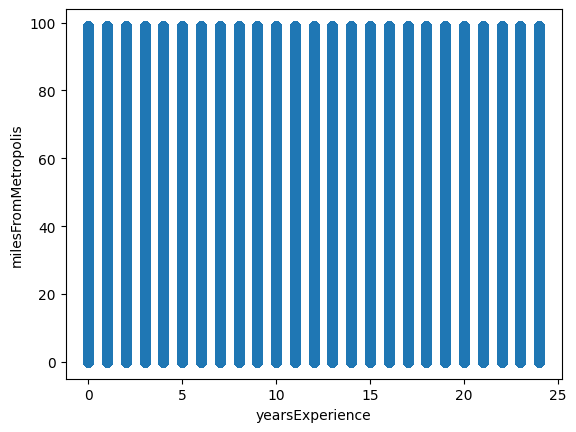

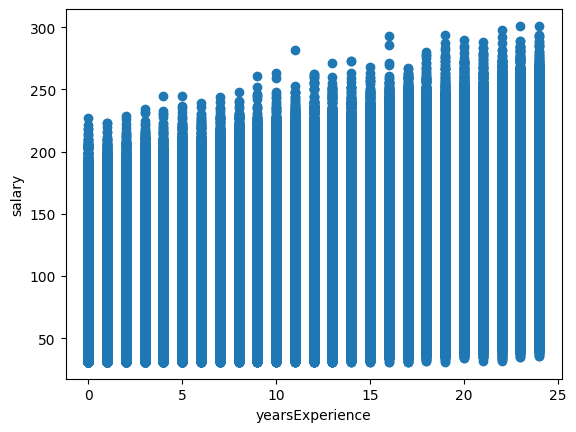

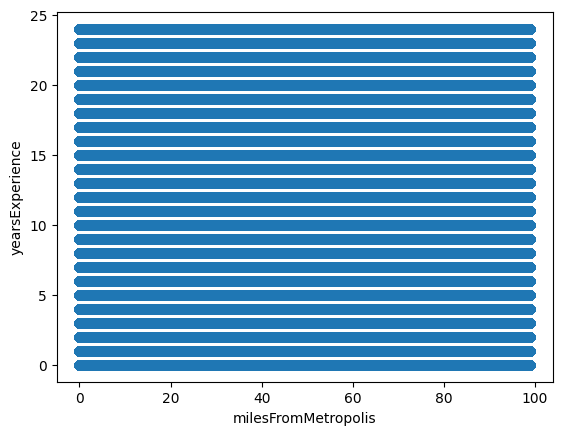

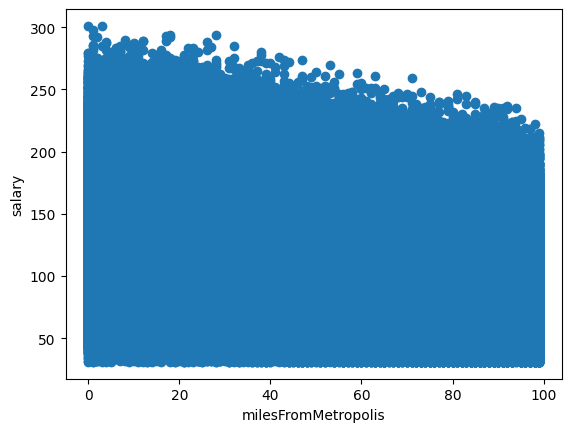

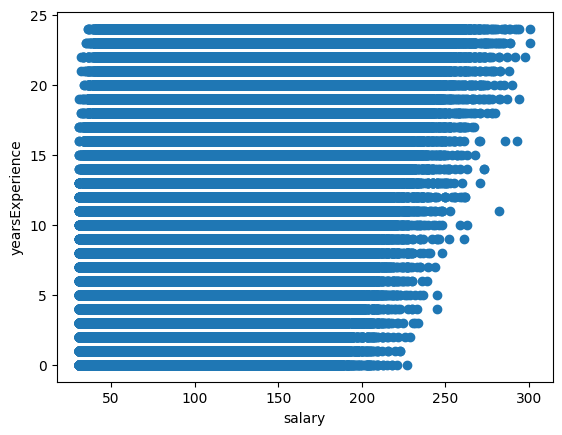

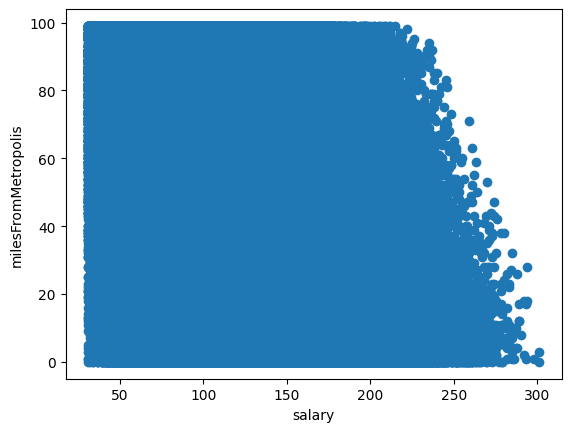

In [30]:
# Scatter plot using matplotlib
# create function for ploting scatterplot between two columns of dataset
def plot_scatter(x, y):
  plt.figure()
  plt.xlabel(x)
  plt.ylabel(y)
  plt.scatter(train_data[x], train_data[y])
  plt.show()


# Loop through the different columns
for i in var_list:
  #print('i',i)
  for j in var_list:
    #print('j',j)
    if i != j:
      plot_scatter(i, j)

From above scatter plot

1. Increase in value on yearsExperience axis results in increase of values on salary axis. That is they are positively correlated.

2. Increase in value on
milesFromMetropolis axis results in decrease of values on salary axis. That is they are negatively correlated.

2. There is no change in values of yearExperience vs milesFromMetropolis graph. That is there is no correlation between these variables.

## Histogram



1. A histogram is an approximate representation of the distribution of numerical data.

2. To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval.

3. The words used to describe the patterns in a histogram are: "symmetric", "skewed left" or "right", "unimodal", "bimodal" or "multimodal".


array([[<Axes: title={'center': 'yearsExperience'}>,
        <Axes: title={'center': 'milesFromMetropolis'}>],
       [<Axes: title={'center': 'salary'}>, <Axes: >]], dtype=object)

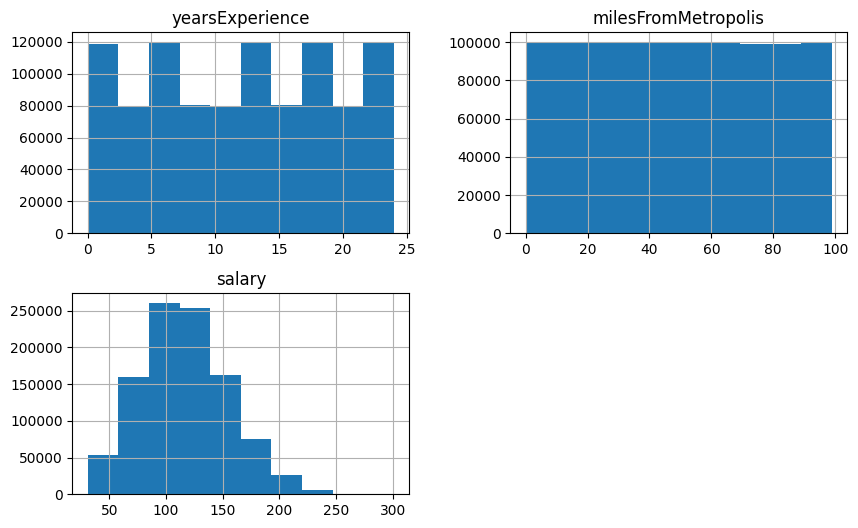

In [31]:
# Histogram using pandas
train_data.hist(figsize=(10,6))



From the above histogram

1. yearsExperience data distribution is symmetric.

2. milesFromMetropolis data distribution is symmetric.

3. salary data distribution is symmetric, unimodel (it has only one peak in distribution)


## Box Plot

A boxplot is a standardized way of displaying the dataset based on a five-number summary:

    1. Minimum (Q0 or 0th percentile): the lowest data point excluding any outliers.

    2. Maximum (Q4 or 100th percentile): the largest data point excluding any outliers.

    3. Median (Q2 or 50th percentile): the middle value of the dataset.

    4. First quartile (Q1 or 25th percentile): also known as the lower quartile qn(0.25), is the median of the lower half of the dataset.

    5. Third quartile (Q3 or 75th percentile): also known as the upper quartile qn(0.75), is the median of the upper half of the dataset


<Axes: >

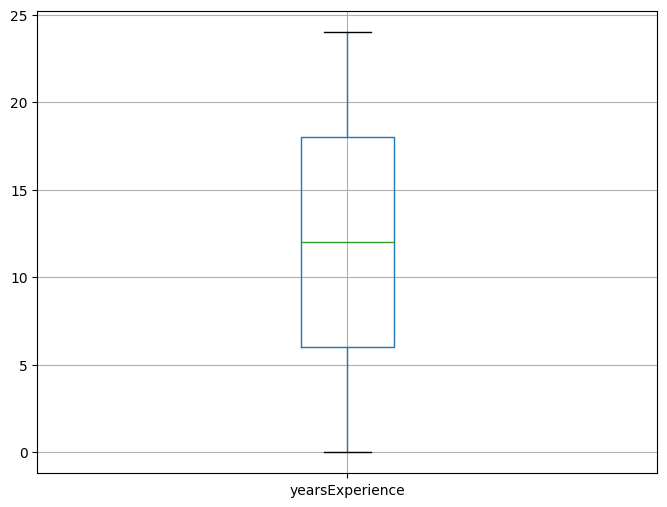

In [32]:
# box plot using pandas
# box plot for yearsExperience column


#sns.boxplot(data=train_data, x = 'yearsExperience')

train_data.boxplot(column='yearsExperience', figsize=(8,6))

from above box plot graph:

- yearsExperience
  1. 25% of employees from dataset has yearExperience of between range 0 to 6.
  2. 25% of employee has yearExperience between range 6 to 12.
  3. 25% of employee has yearExperience between range 12 to 18.
  4. 25% of employee has yearExperience between range 18 to 24

<Axes: >

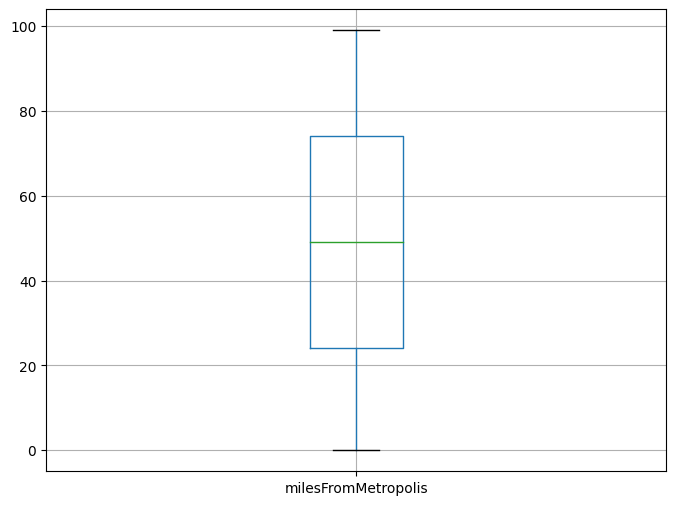

In [33]:
# box plot using pandas
# box plot for milesFromMetropolies column


train_data.boxplot(column='milesFromMetropolis', figsize=(8,6))


from above box plot graph:

- yearsExperience
  1. 25% of employees from dataset has value of milesFromMetropolis between range 0 to 24.
  2. 25% of employee has value of milesFromMetropolis between range 24 to 52.
  3. 25% of employee has value of milesFromMetropolis between range 52 to 76.
  4. 25% of employee has value of milesFromMetropolis between range 76 to 100

<Axes: >

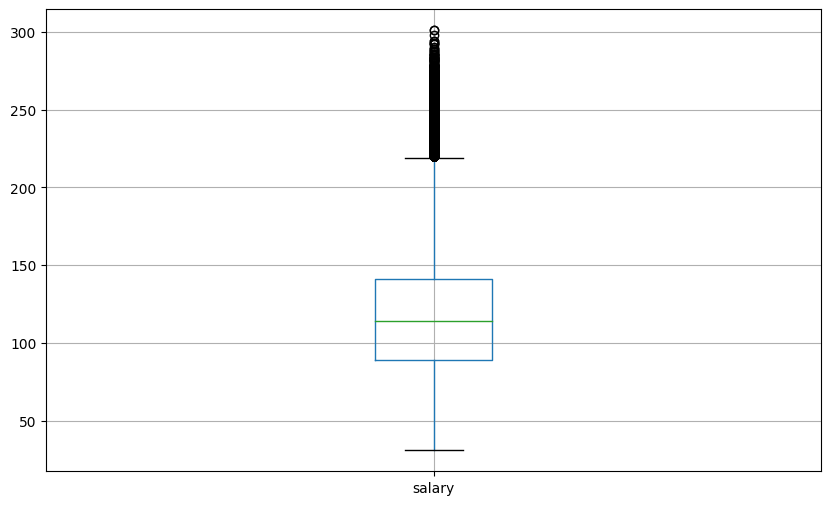

In [34]:
# box plot using pandas
# box plot for salary column

train_data.boxplot(column='salary', figsize=(10, 6))



from above box plot graph:

- yearsExperience
  1. 25% of employees from dataset has value of salary between range 0 to 88.
  2. 25% of employee has value of salary between range 88 to 120.
  3. 25% of employee has value of salary between range 120 to 150.
  4. 25% of employee has value of salary between range 150 to 300


- The mean salary is around 120


## Violin Plot



1. A violin plot is a method of plotting numeric data.

1. Violin plots are similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimator.

3. It has:

    1. Median (a white dot on the violin plot)
    2. Interquartile range (the black bar in the center of violin)
    3. The lower/upper adjacent values (the black lines stretched from the bar) — defined as first quartile — 1.5 IQR and third quartile + 1.5 IQR respectively.

<Axes: xlabel='yearsExperience', ylabel='salary'>

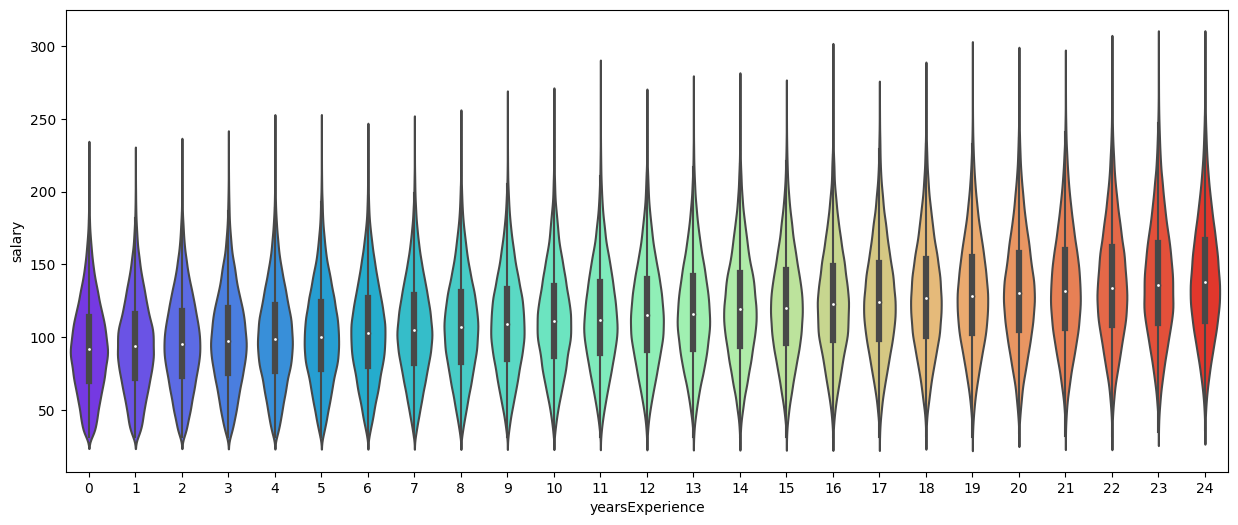

In [ ]:
# violin plot for yearsExperience and salary columns
plt.figure(figsize=(15,6))

sns.violinplot(data = train_data, x = 'yearsExperience' ,y = 'salary', palette='rainbow')



from above violin plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile. whereas median has the highest.
3. The salary range is increasing as we move right on the axis of yearExperience

<Axes: xlabel='milesFromMetropolis', ylabel='salary'>

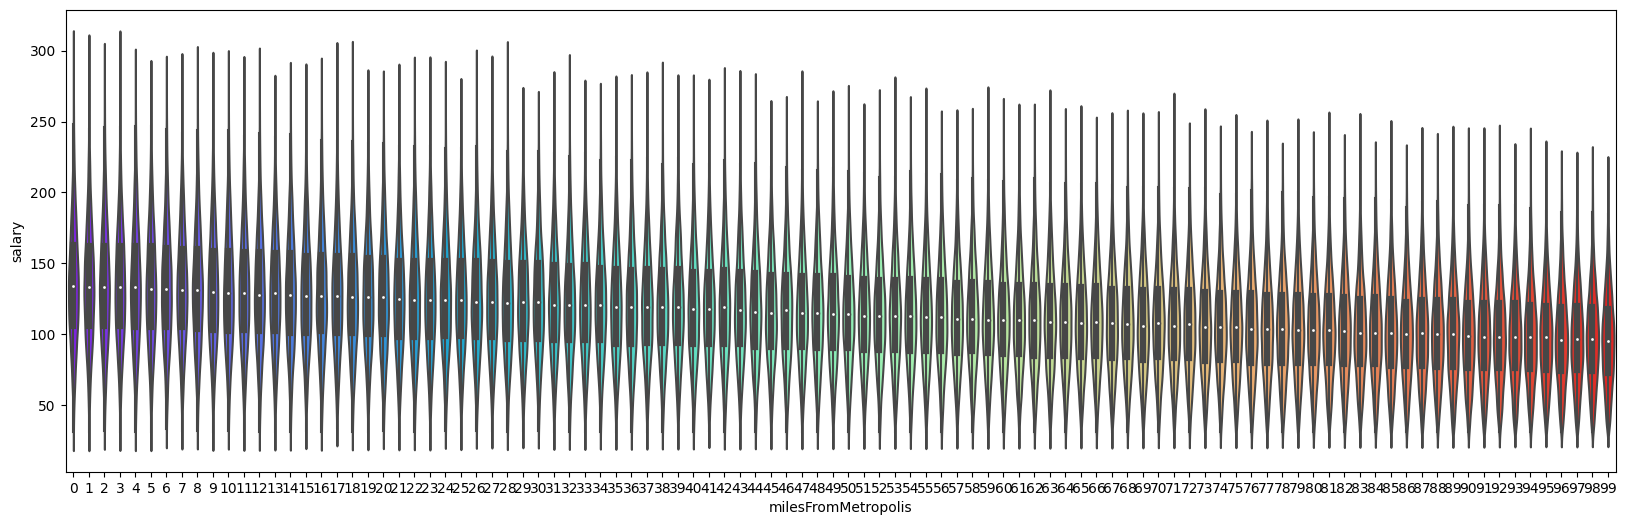

In [ ]:
# violin plot for milesFromMetropolis from salary columns
plt.figure(figsize=(20,6))

sns.violinplot(data= train_data, x= 'milesFromMetropolis', y='salary', palette='rainbow')



from above violin plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile.
3. The salary range is decreasing as we move right on the axis of milesFromMetropolis


## Boxenplot

1. The boxen plot, otherwise known as a Letter-value plot, is a box plot meant for large data sets (n > 10,000).

2. The Boxen plot is very similar to box plot, except for the fact that it plots different quartile values.

3. By plotting different quartile values, we are able to understand the shape of the distribution particularly in the head end and tail end.


<Axes: xlabel='yearsExperience', ylabel='salary'>

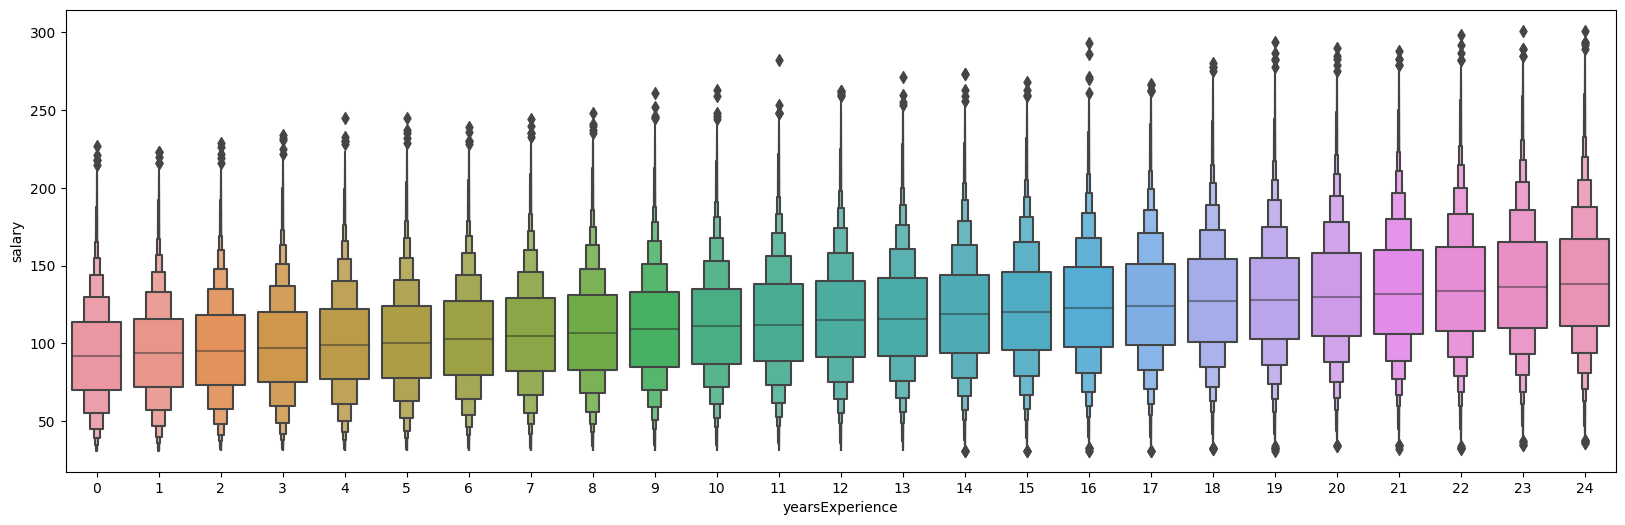

In [ ]:
# boxen plot for yearsExperience and salary columns
plt.figure(figsize=(20,6))

sns.boxenplot(data=train_data, x = 'yearsExperience', y='salary')



## Count Plot

1. A countplot is kind of like a histogram or a bar graph for some categorical area.

2. It simply shows the number of occurrences of an item based on a certain type of category.


<Axes: xlabel='yearsExperience', ylabel='count'>

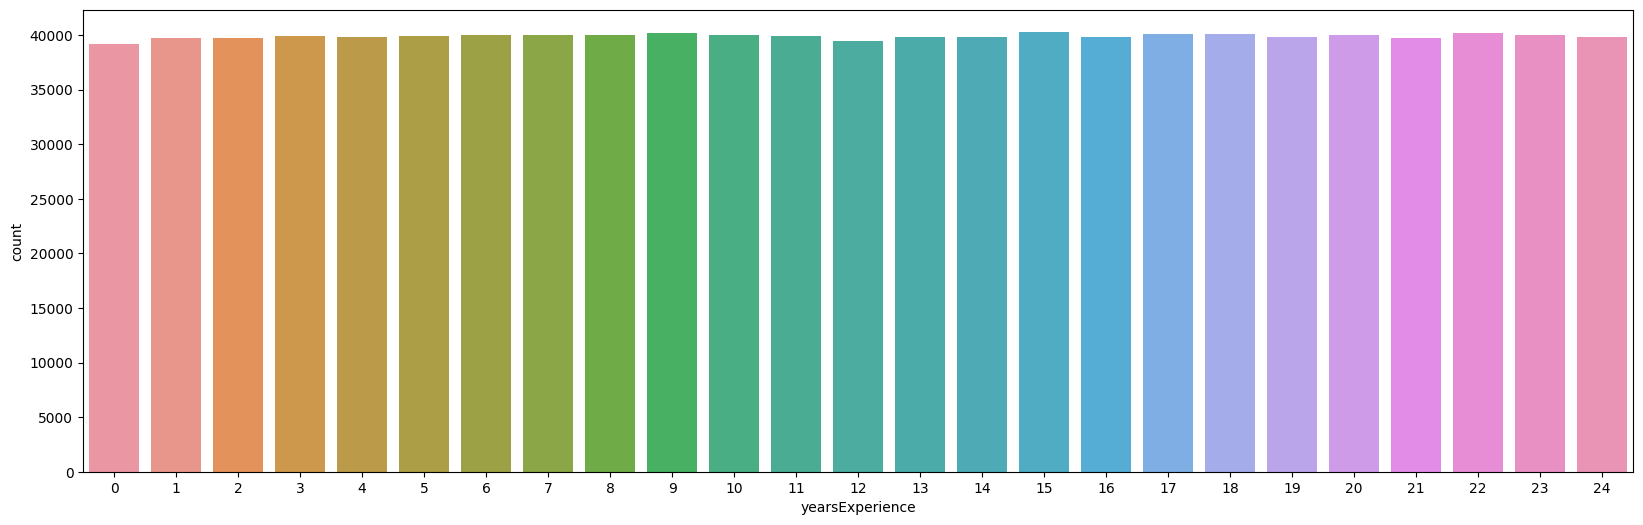

In [ ]:
# count plot of whole datset based on yearsExperience
plt.figure(figsize=(20,6))

sns.countplot(data= train_data, x ='yearsExperience')



From above count plot

distribution of values of yearExperience is equal over complete dataset, symmetrical.

<Axes: xlabel='milesFromMetropolis', ylabel='count'>

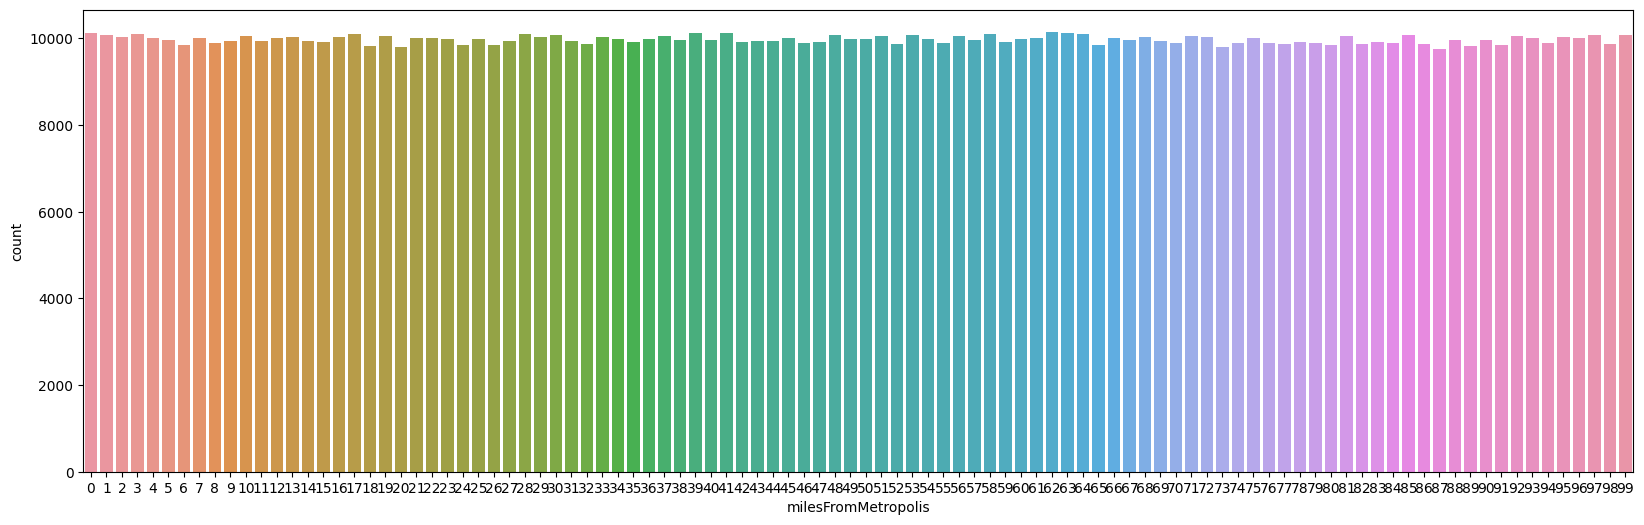

In [ ]:
# count plot of whole datset based on milesFromMetropolis
plt.figure(figsize=(20,6))

sns.countplot(data= train_data, x ='milesFromMetropolis')



From above count plot

distribution of values of milesFromMetropolis is almost equal over complete dataset, symmetrical

## Subset of train dataset

ploting process of swarm plot was taking huge time because of large dataset.

So, we take a subset of 50000 samples from train datset and plot it for interpretation.

## Swarm Plot



1. The swarm plot is a type of scatter plot, but helps in visualizing different categorical variables.

2. Scatter plots generally plots based on numeric values, but most of the data analyses happens on categorical variables. So, swarm plots seem very useful in those cases.


plot data on 50000 of 1000000 sample for clear visualization.

<Axes: xlabel='yearsExperience', ylabel='salary'>

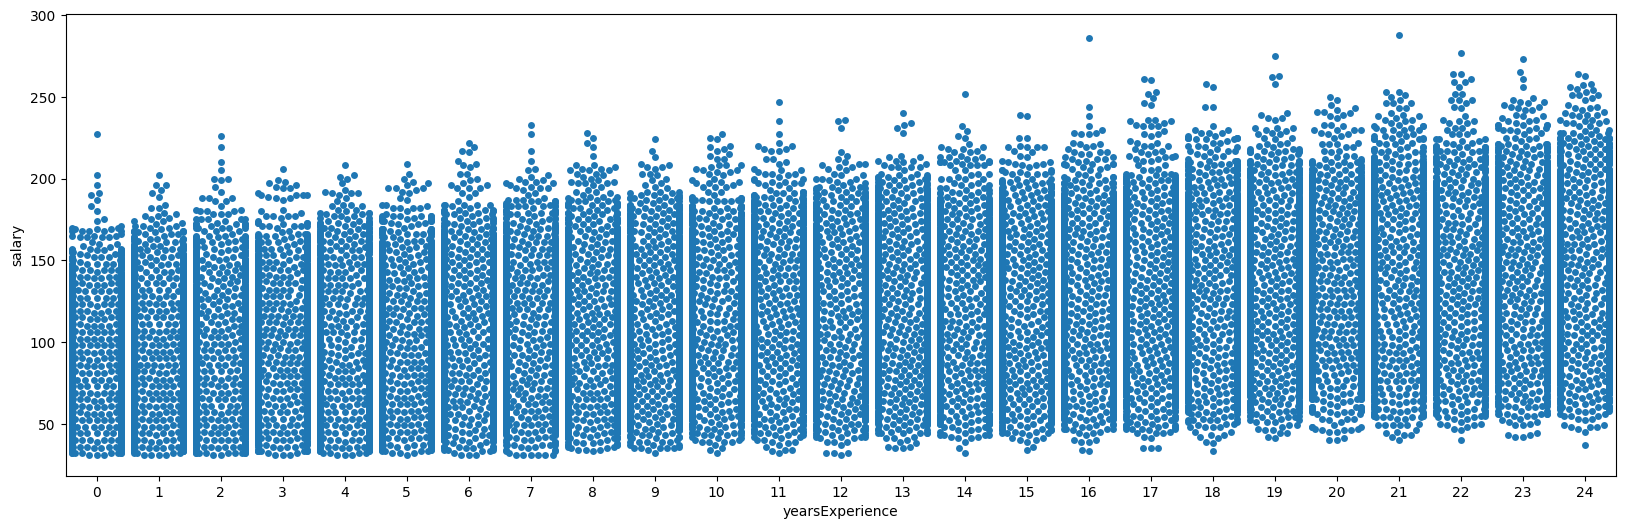

In [ ]:
# swarm plot for yearsExperience and salary columns
plt.figure(figsize=(20,6))
sns.swarmplot(data=train_data.iloc[50000:100000,:], x='yearsExperience', y='salary')


from above swarm plot:

1. The distribution between lower adjacent value and upper adjacent value is symmetrical.

2. also there is higher observation probability at the between first quartile and third quartile.

3. The salary range is increasing as we move right on the axis of yearExperience

<Axes: xlabel='milesFromMetropolis', ylabel='salary'>

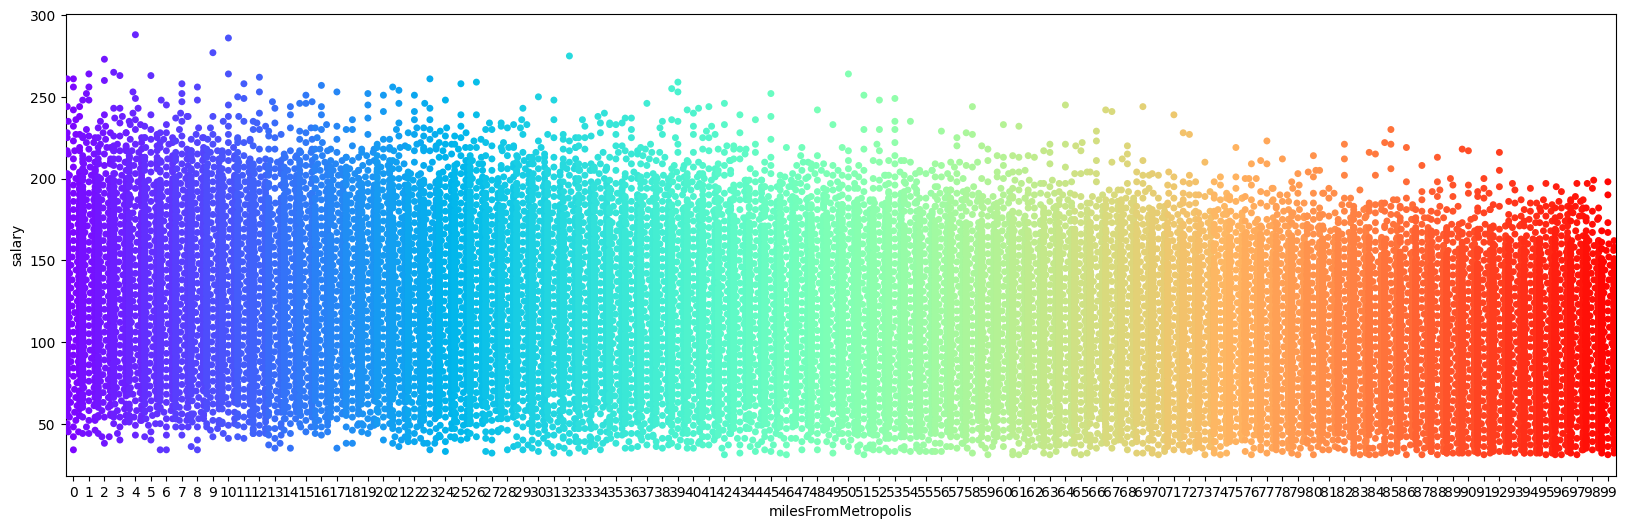

In [ ]:
# swarm plot for milesFromMetropolis and salary columns
plt.figure(figsize=(20,6))

sns.swarmplot(data=train_data.iloc[50000:100000], x='milesFromMetropolis', y='salary', palette='rainbow')


from above swarm plot:

1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile.

3. The salary range is decreasing as we move right on the axis of milesFromMetropolis

## Combine plot

Combination of boxenplot and swarm plot

<Axes: xlabel='yearsExperience', ylabel='salary'>

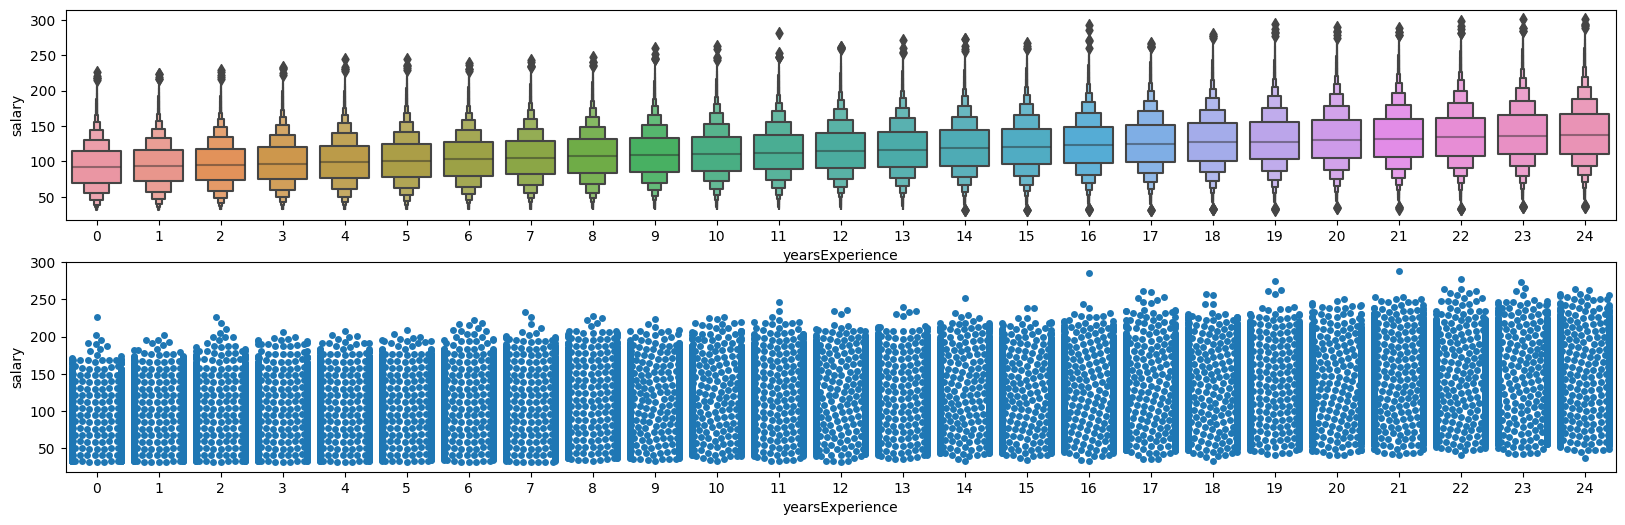

In [ ]:
# combine boxen and swarm plot for yearsExperience and salary columns
plt.figure(figsize=(20,6))

plt.subplot(2,1,1)
sns.boxenplot(data=train_data, x = 'yearsExperience', y='salary')

plt.subplot(2,1,2)
sns.swarmplot(data=train_data.iloc[50000:100000,:], x='yearsExperience', y='salary')


from above combine plot:

1. The distribution between lower adjacent value and upper adjacent value is symmetrical.

2. also there is higher observation probability at the between first quartile and third quartile.

3. The salary range is increasing as we move right on the axis of yearExperience

<Axes: xlabel='milesFromMetropolis', ylabel='salary'>

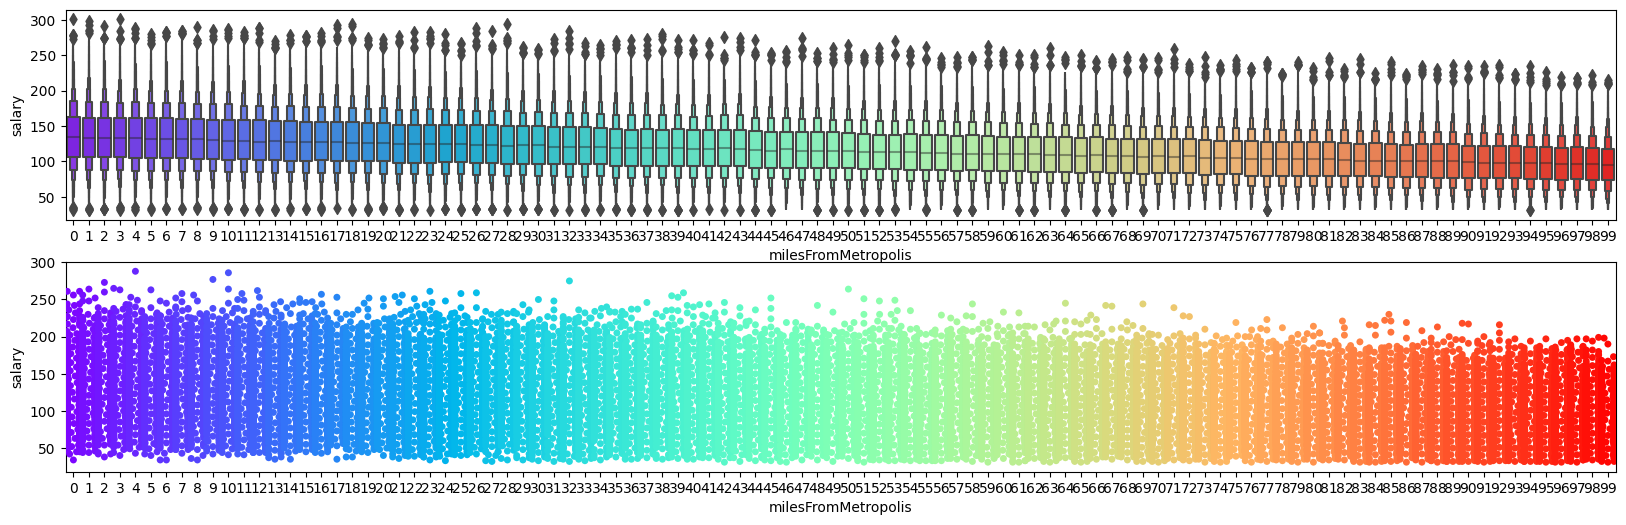

In [ ]:
from pandas.compat.pyarrow import pa
# combine boxen and swarm plot for milesFromMetropolis and salary columns
plt.figure(figsize=(20,6))
plt.subplot(2,1,1)
sns.boxenplot(data=train_data, x='milesFromMetropolis', y='salary', palette='rainbow')
plt.subplot(2,1,2)
sns.swarmplot(data=train_data.iloc[50000:100000], x='milesFromMetropolis', y='salary', palette='rainbow')


from above combine plot:

1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile.

3. The salary range is decreasing as we move right on the axis of milesFromMetropolis

# Strip Plot

A strip plot is a graphical data anlysis technique for summarizing a univariate data set. The strip plot consists of:

    1. Horizontal axis = the value of the response variable;
    2. Verticalal axis = all values are set to 1.

That is, a strip plot is simply a plot of the sorted response values along one axis. The strip plot is an alternative to a histogram or a density plot. It is typically used for small data sets (histograms and density plots are typically preferred for larger data sets).

<Axes: xlabel='yearsExperience', ylabel='salary'>

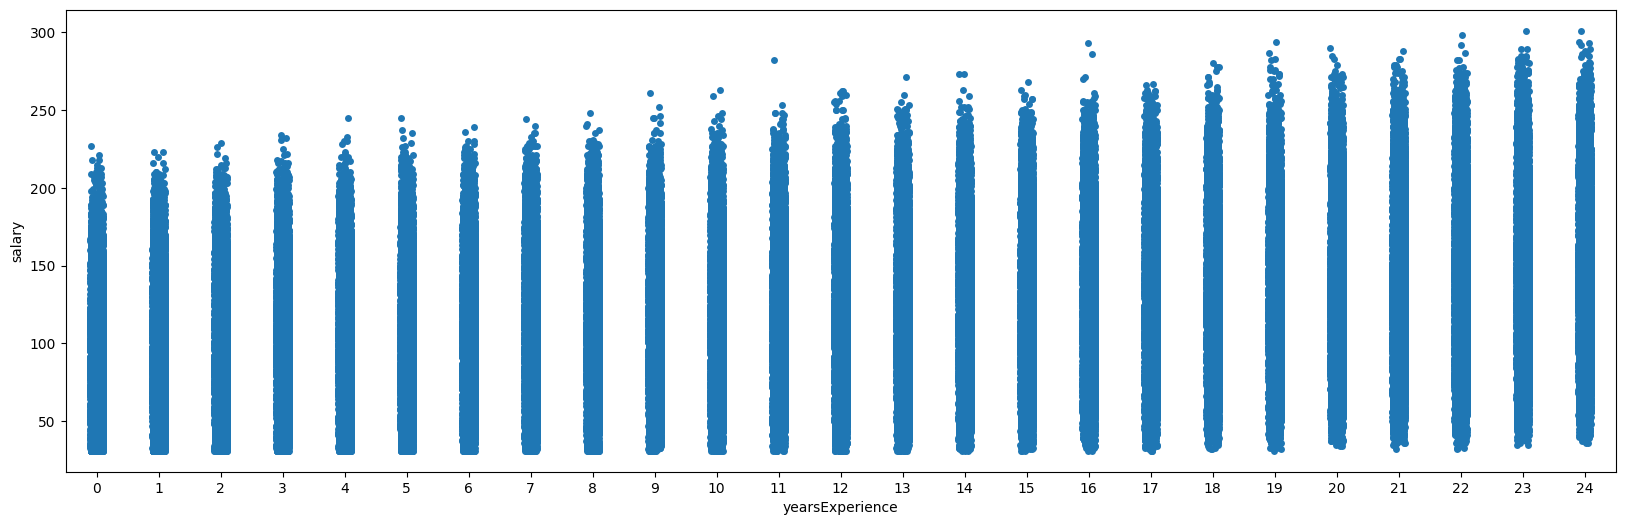

In [ ]:
# strip plot between yearsExperience and salary columns
plt.figure(figsize=(20,6))

sns.stripplot(data=train_data, x='yearsExperience', y='salary')


from above strip plot:

Distribution of values of Salary increases for increase in values of yearsExperience

<Axes: xlabel='milesFromMetropolis', ylabel='salary'>

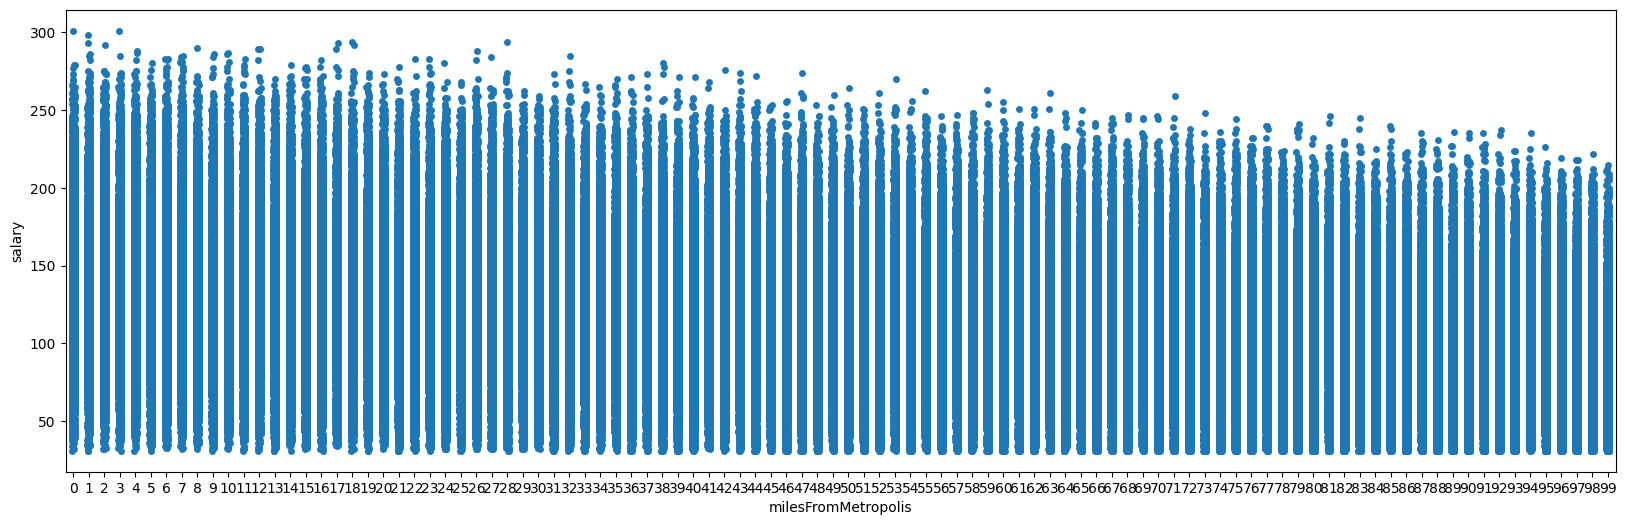

In [ ]:
# strip plot between milesFromMetropolis and salary columns
plt.figure(figsize=(20,6))

sns.stripplot(data=train_data, x='milesFromMetropolis', y='salary')


from above strip plot:

Distribution of values of Salary decreases for increase in values of milesFromMetropolis

## Variance inflation factor (VIF)

1. The variance inflation factor (VIF) quantifies the extent of correlation between one predictor and the other predictors in a model.
2. It is used for diagnosing collinearity/multicollinearity.
3. Higher values signify that it is difficult to impossible to assess accurately the contribution of predictors to a model.

In [35]:
# import statsmodle library for vif
import statsmodels.api as sm

In [36]:
train_data.columns

Index(['jobType', 'degree', 'major', 'industry', 'yearsExperience',
       'milesFromMetropolis', 'salary'],
      dtype='object')

In [37]:
# creating a dataframe of just numerical values
train_for_vif = train_data.drop(columns=['jobType', 'degree', 'major', 'industry','salary'], axis=1)

# target values
target = train_data['salary']

# numerical values column names
names = ['yearsExperience','milesFromMetropolis']
train_for_vif.dropna(inplace=True)
names

['yearsExperience', 'milesFromMetropolis']

In [38]:
train_for_vif.head()

yearsExperience  milesFromMetropolis
0               10                   83
1                3                   73
2               10                   38
3                8                   17
4                8                   16

In [39]:
# Calculating VIF for each feature.
for i in range(0, len(names)):
  # taking one column as target variable
  y = train_for_vif.loc[:,train_for_vif.columns == names[i]]
  # taking all other remaining columns as fetaure variable
  x = train_for_vif.loc[:,train_for_vif.columns != names[i]]
  # firting the OLS model on y and x
  model = sm.OLS(y, x)
  results = model.fit()
  # geting the r^2 value of results.
  rsq = results.rsquared
  # calculating vif value
  vif = round(1/(1-rsq),2)
  print("R Square value of {} column is {} keeping all other columns as features".format(names[i],(round(rsq, 2))))
  print("Variance inflation Factor(VIF) of {} columns is {} \n".format(names[i], vif))

R Square value of yearsExperience column is 0.55 keeping all other columns as features
Variance inflation Factor(VIF) of yearsExperience columns is 2.22 

R Square value of milesFromMetropolis column is 0.55 keeping all other columns as features
Variance inflation Factor(VIF) of milesFromMetropolis columns is 2.22 



Observations:

there is colinearity/multicolinearity between
variables as the VIF value is almost upto 2.5

1. yearsExperience and milesFromMetropolis both have colinearity with all the variables.

## ANOVA Test

### Normality Assumption Check

Before we perform the hypothesis test, we check if the assumptions for the one-way ANOVA hypothesis test are fulfilled. The samples are random and independent samples. Now, we check the normality assumption by plotting a normal probability plot (Q-Q plots) for each grouped variable.

### Homogeneity of variance Assumption Check

### Hypothesis Testing

According to five steps process of hypothesis testing:
H₀: μ₁= μ₂ = μ₃ = … = μ₆
H₁: Not all salary means are equal
α = 0.05
According to F test statistics:

In [40]:
# perform anova test between two variables.

def perform_anova_test(x,y):
  # two variables of interest
  train_anova = train_data[[x, y]]
  groups = train_anova.groupby(x).count().reset_index()
  # groups.plot(kind='bar',x='major',y='salary')
  print(groups)


  unique_majors = train_anova[x].unique()
  for major in unique_majors:
      stats.probplot(train_anova[train_anova[x] == major][y], dist="norm", plot=plt)
      plt.title("Probability Plot - " +  str(major))
      plt.show()


  # calculate ratio of the largest to the smallest sample standard deviation
  ratio = train_anova.groupby(x).std().max() / train_anova.groupby(x).std().min()
  print(ratio)


  # Create ANOVA backbone table
  data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']]
  anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit'])    #ss=sum of squares source, ms=mean sum of squares source
  anova_table.set_index('Source of Variation', inplace = True)

  # calculate SSTR and update anova table
  x_bar = train_anova[y].mean()
  SSTR = train_anova.groupby(x).count() * (train_anova.groupby(x).mean() - x_bar)**2
  anova_table['SS']['Between Groups'] = SSTR[y].sum()

  # calculate SSE and update anova table
  SSE = (train_anova.groupby(x).count() - 1) * train_anova.groupby(x).std()**2
  anova_table['SS']['Within Groups'] = SSE[y].sum()

  # calculate SSTR and update anova table
  SSTR = SSTR[y].sum() + SSE[y].sum()
  anova_table['SS']['Total'] = SSTR

  # update degree of freedom
  anova_table['df']['Between Groups'] = train_anova[x].nunique() - 1
  anova_table['df']['Within Groups'] = train_anova.shape[0] - train_anova[x].nunique()
  anova_table['df']['Total'] = train_anova.shape[0] - 1

  # calculate MS
  anova_table['MS'] = anova_table['SS'] / anova_table['df']

  # calculate F
  F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
  anova_table['F']['Between Groups'] = F

  # p-value
  anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

  # F critical
  alpha = 0.05
  # possible types "right-tailed, left-tailed, two-tailed"
  tail_hypothesis_type = "two-tailed"
  if tail_hypothesis_type == "two-tailed":
      alpha /= 2
  anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

  # Final ANOVA Table
  print(anova_table)


  # The p-value approach
  print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
  conclusion = "Failed to reject the null hypothesis."
  if anova_table['P-value']['Between Groups'] <= alpha:
      conclusion = "Null Hypothesis is rejected."
  print("F-score is:", anova_table['F']['Between Groups'], " and p value is:", anova_table['P-value']['Between Groups'])
  print(conclusion)

  # The critical value approach
  print("\n--------------------------------------------------------------------------------------")
  print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
  conclusion = "Failed to reject the null hypothesis."
  if anova_table['F']['Between Groups'] > anova_table['F crit']['Between Groups']:
      conclusion = "Null Hypothesis is rejected."
  print("F-score is:", anova_table['F']['Between Groups'], " and critical value is:", anova_table['F crit']['Between Groups'])
  print(conclusion)

         major  salary
0      BIOLOGY   58379
1     BUSINESS   58518
2    CHEMISTRY   58875
3      COMPSCI   58382
4  ENGINEERING   58594
5   LITERATURE   58684
6         MATH   57800
7         NONE  529906
8      PHYSICS   58410


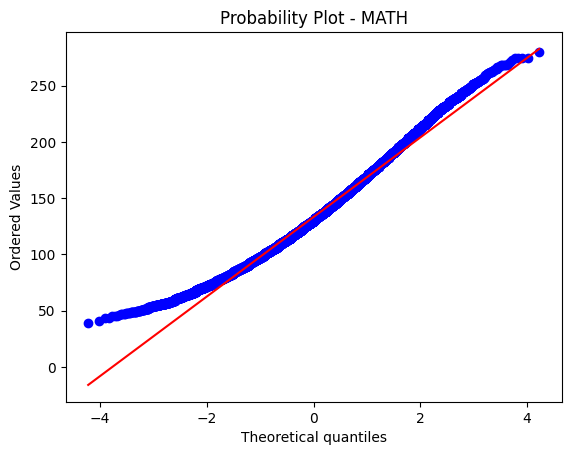

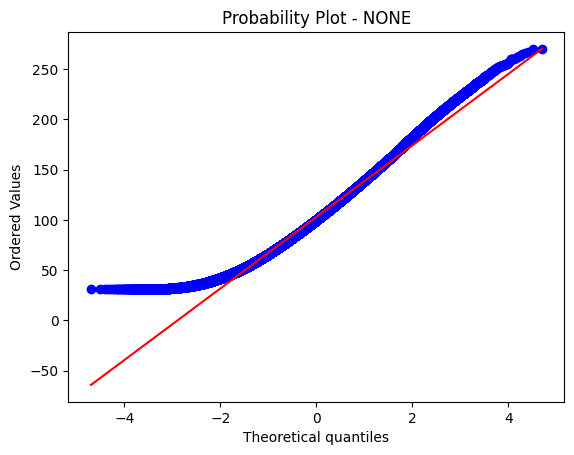

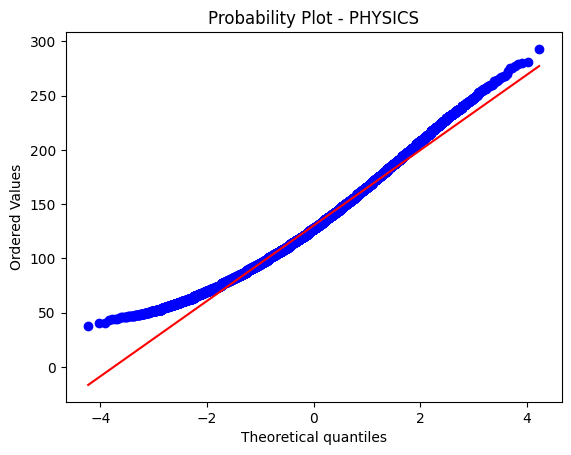

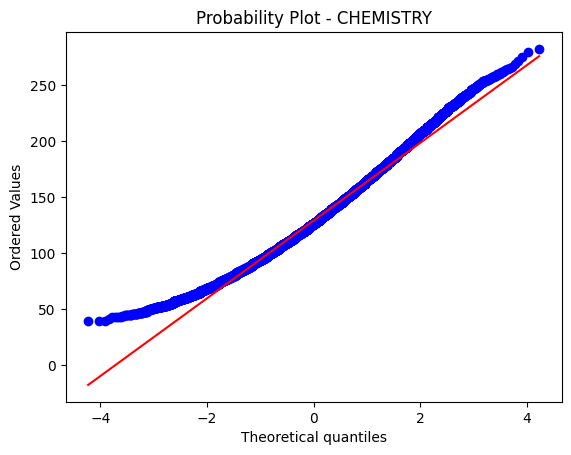

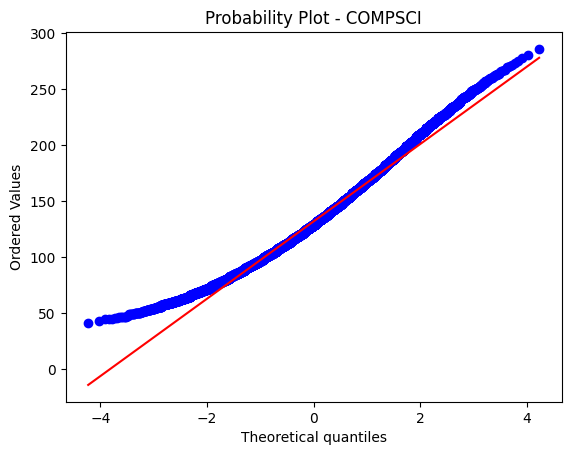

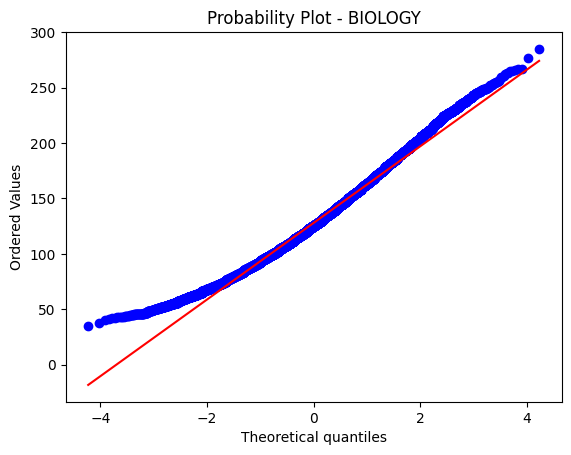

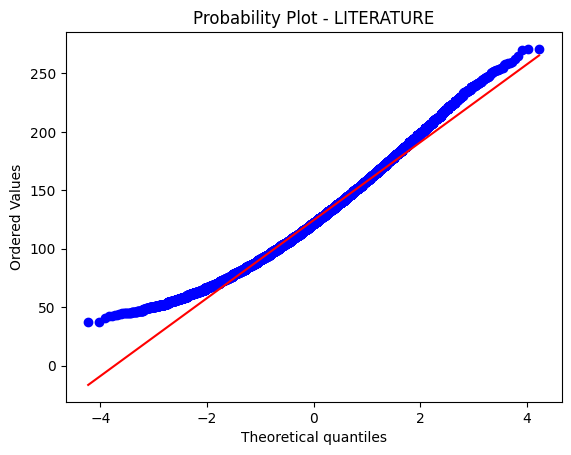

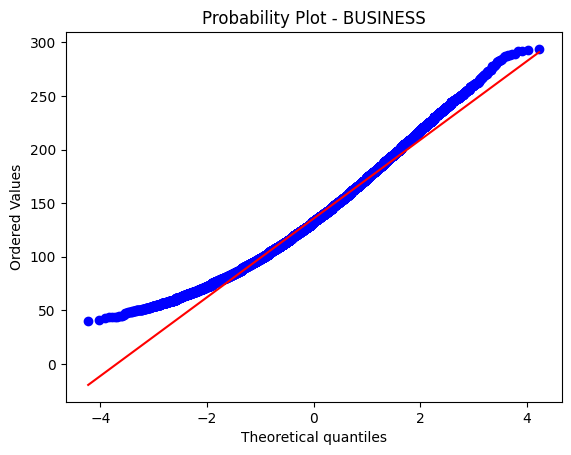

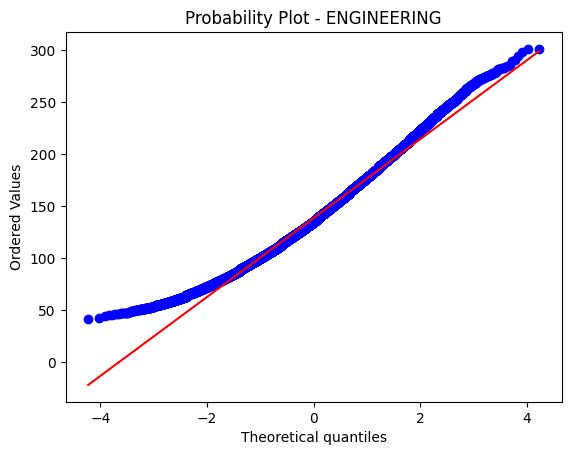

salary    1.137076
dtype: float64
                                    SS      df               MS             F  \
Source of Variation                                                             
Between Groups        209547309.494914       8  26193413.686864  20572.997068   
Within Groups        1270060536.615651  997539      1273.193867                 
Total                1479607846.110565  997547      1483.246249                 

                    P-value    F crit  
Source of Variation                    
Between Groups          0.0  2.191831  
Within Groups                          
Total                                  
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 20572.997067846136  and p value is: 1.1102230246251565e-16
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 2

In [41]:
# perform anova test on major and salary

perform_anova_test('major', 'salary')


          jobType  salary
0             CEO  124778
1             CFO  124369
2             CTO  125045
3         JANITOR  122562
4          JUNIOR  124554
5         MANAGER  125120
6          SENIOR  125886
7  VICE_PRESIDENT  125234


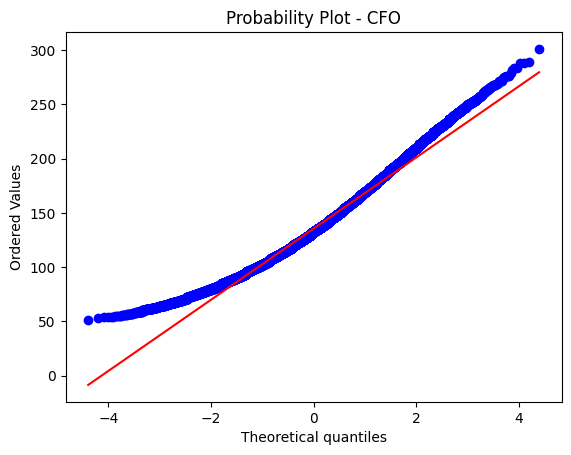

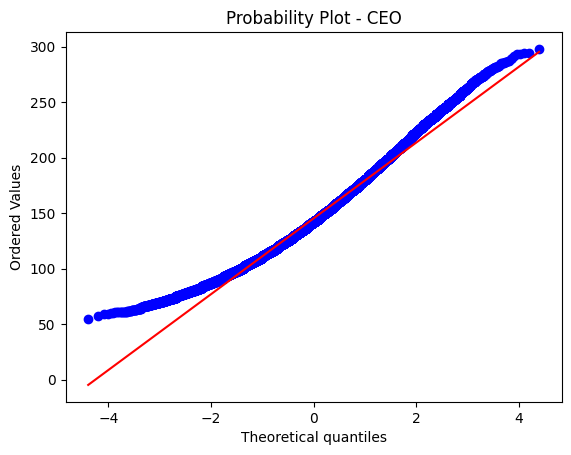

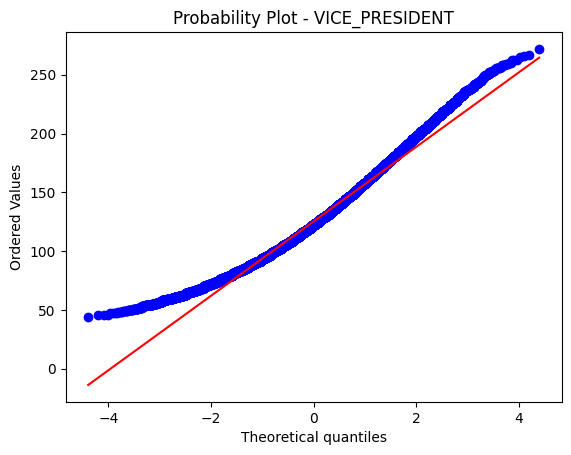

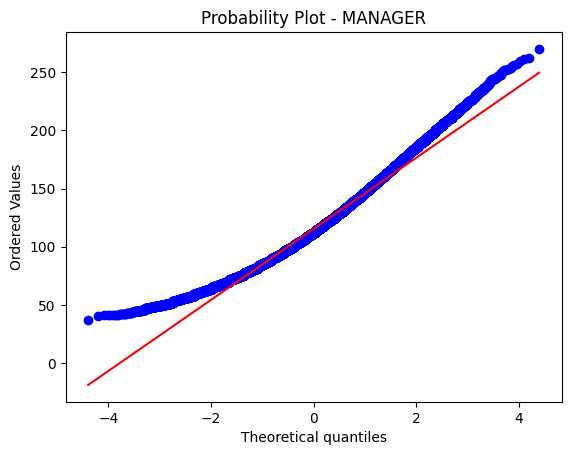

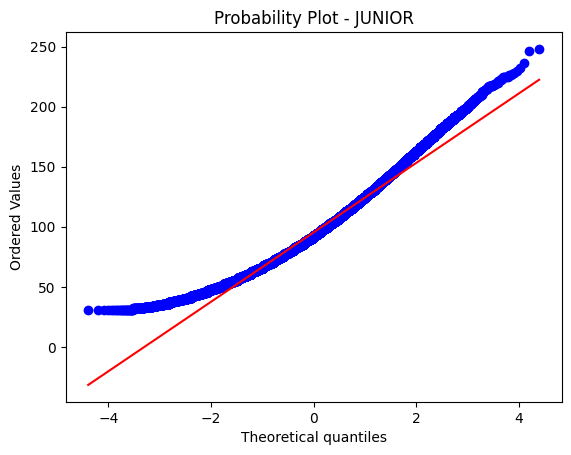

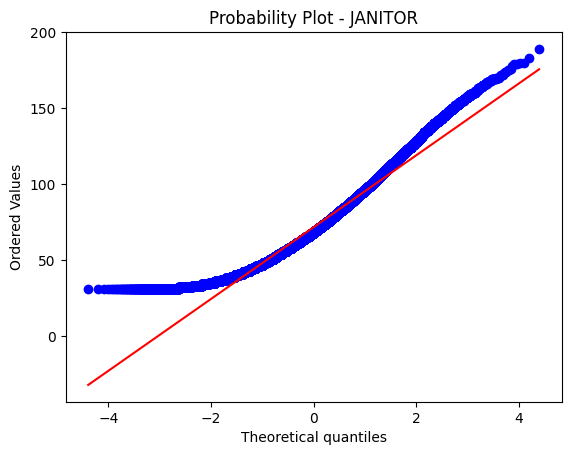

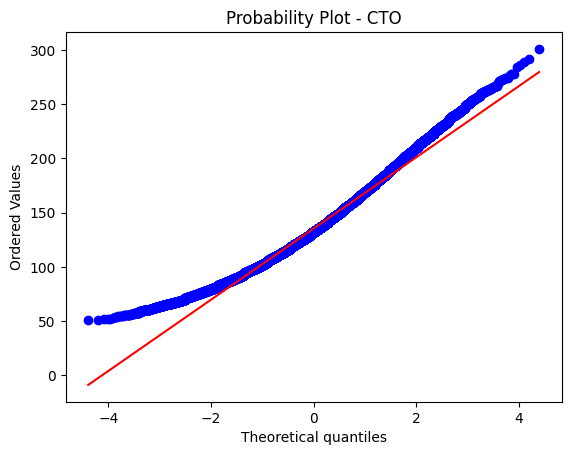

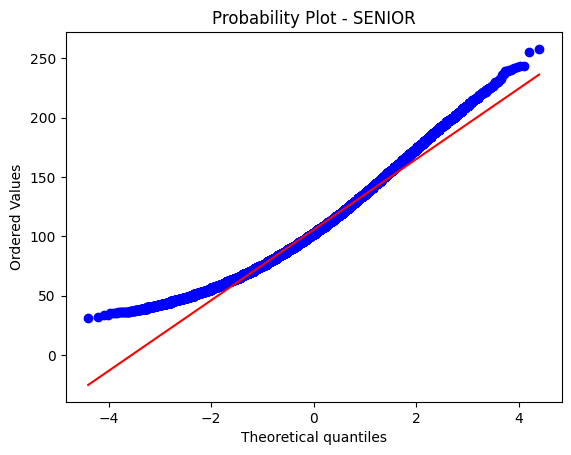

salary    1.428316
dtype: float64
                                    SS      df               MS             F  \
Source of Variation                                                             
Between Groups        520557906.406689       7  74365415.200956  77349.961883   
Within Groups         959049939.703873  997540       961.415021                 
Total                1479607846.110561  997547      1483.246249                 

                    P-value   F crit  
Source of Variation                   
Between Groups          0.0  2.28755  
Within Groups                         
Total                                 
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 77349.96188255494  and p value is: 1.1102230246251565e-16
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 77349.9

In [42]:
# perform anova test on jobType and salary

perform_anova_test('jobType', 'salary')


        degree  salary
0    BACHELORS  175495
1     DOCTORAL  175362
2  HIGH_SCHOOL  235769
3      MASTERS  175310
4         NONE  235612


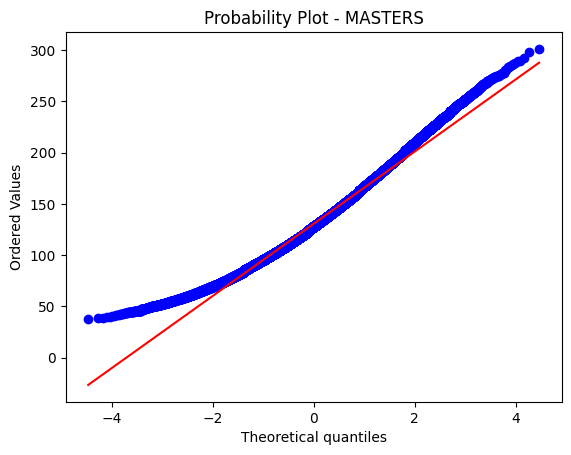

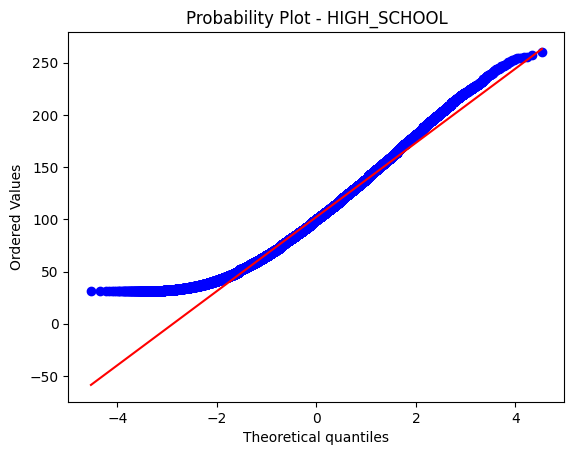

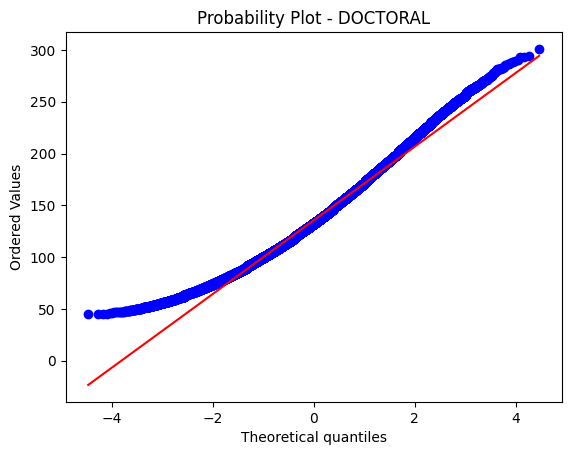

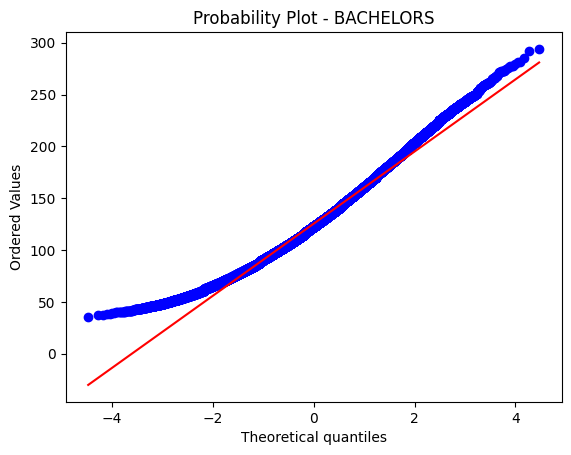

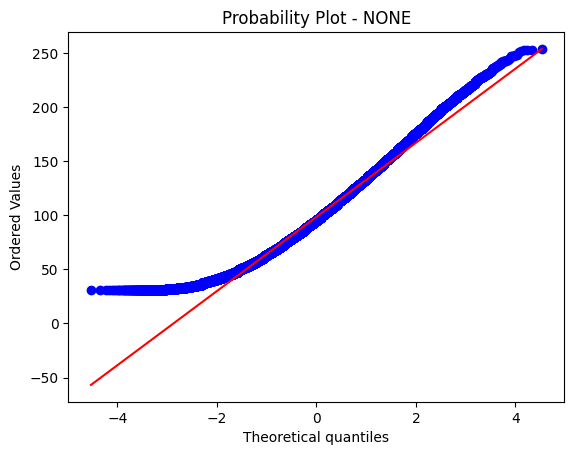

salary    1.034168
dtype: float64
                                    SS      df               MS             F  \
Source of Variation                                                             
Between Groups        235082352.781875       4  58770588.195469  47107.262306   
Within Groups        1244525493.328681  997543      1247.590824                 
Total                1479607846.110556  997547      1483.246249                 

                    P-value    F crit  
Source of Variation                    
Between Groups          0.0  2.785834  
Within Groups                          
Total                                  
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 47107.26230562572  and p value is: 1.1102230246251565e-16
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 47

In [43]:
# perform anova test on degree and salary

perform_anova_test('degree', 'salary')


    industry  salary
0       AUTO  142766
1  EDUCATION  141149
2    FINANCE  142866
3     HEALTH  142736
4        OIL  142770
5    SERVICE  142056
6        WEB  143205


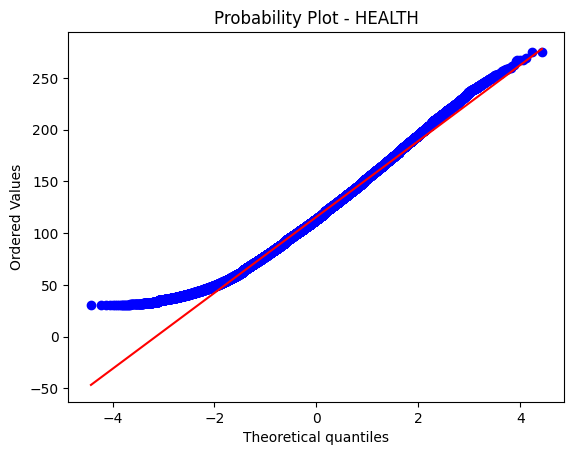

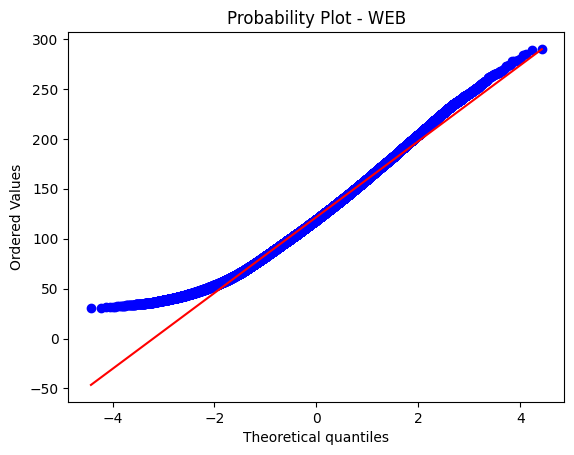

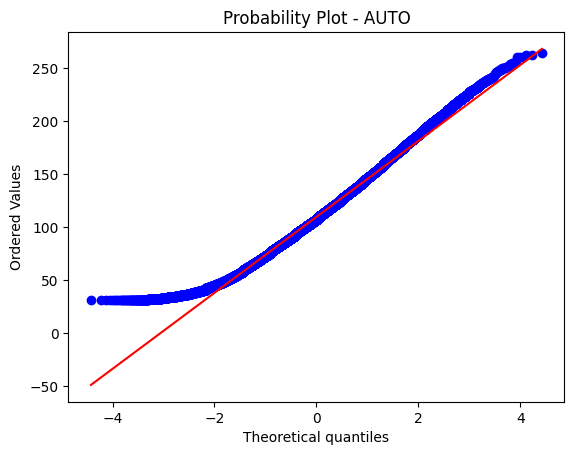

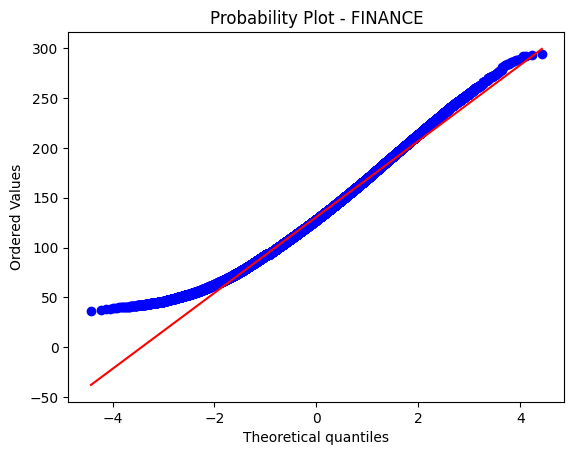

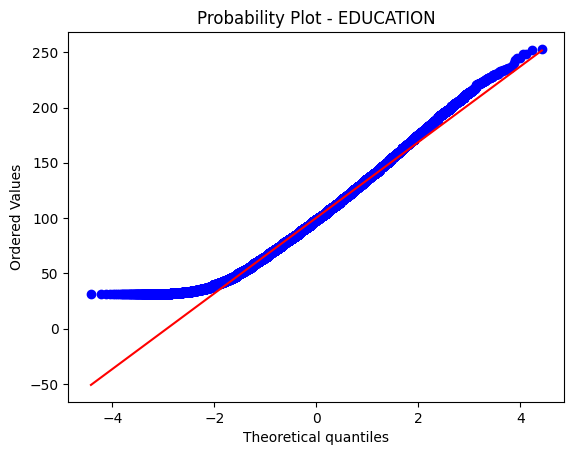

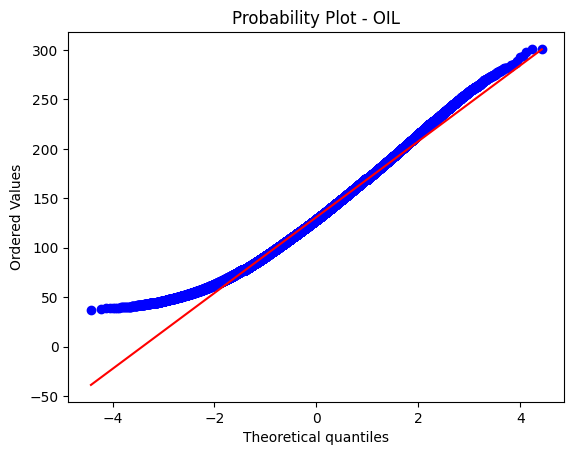

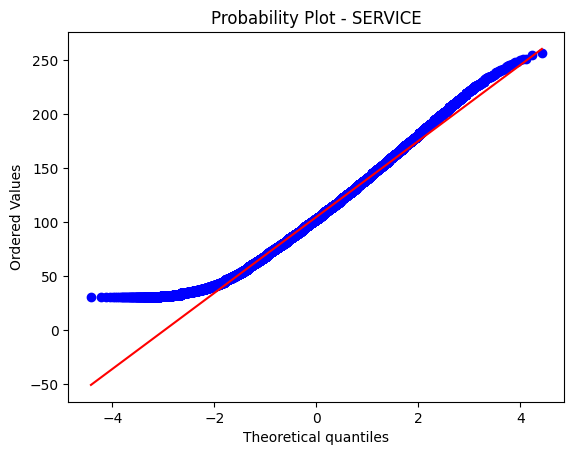

salary    1.119722
dtype: float64
                                    SS      df             MS             F  \
Source of Variation                                                           
Between Groups        126158683.032602       6  21026447.1721  15497.252287   
Within Groups         1353449163.07796  997541    1356.785499                 
Total                1479607846.110562  997547    1483.246249                 

                    P-value    F crit  
Source of Variation                    
Between Groups          0.0  2.408242  
Within Groups                          
Total                                  
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 15497.25228748466  and p value is: 1.1102230246251565e-16
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 15497.252287

In [44]:
# perform anova test on industry and salary

perform_anova_test('industry', 'salary')


          jobType  yearsExperience
0             CEO           124778
1             CFO           124369
2             CTO           125045
3         JANITOR           122562
4          JUNIOR           124554
5         MANAGER           125120
6          SENIOR           125886
7  VICE_PRESIDENT           125234


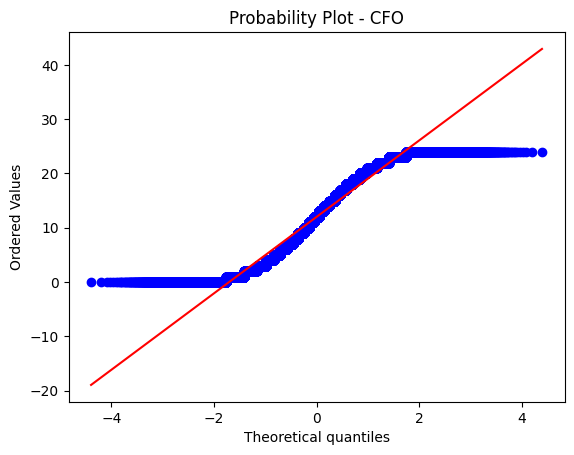

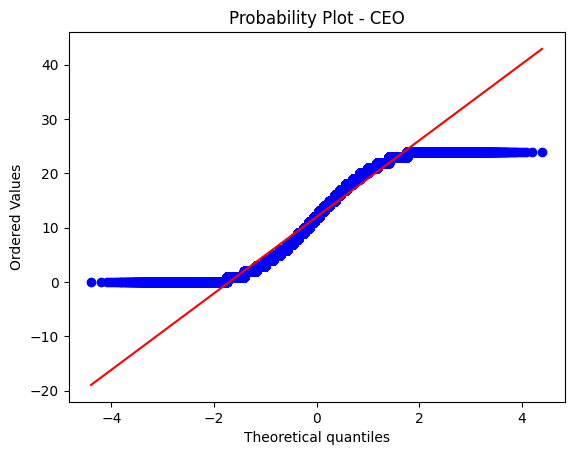

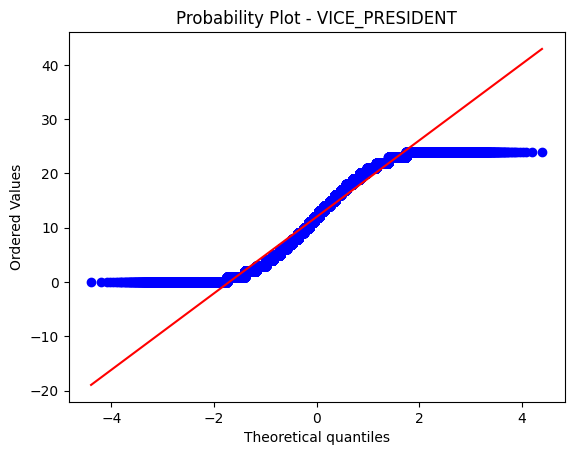

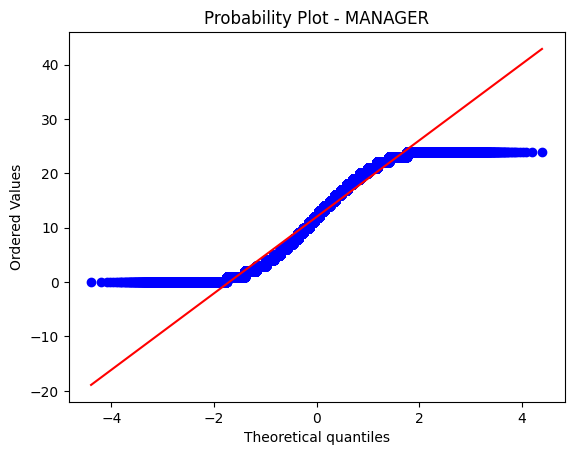

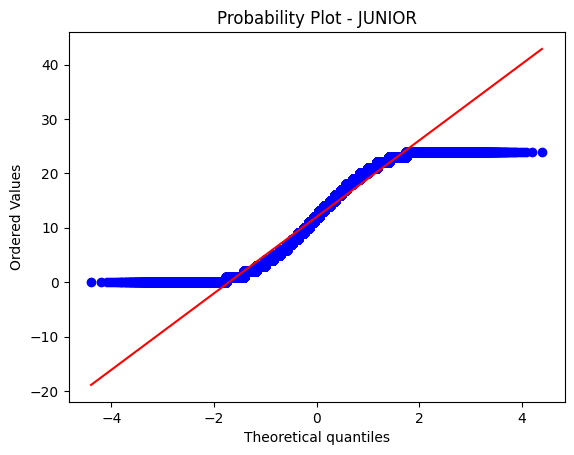

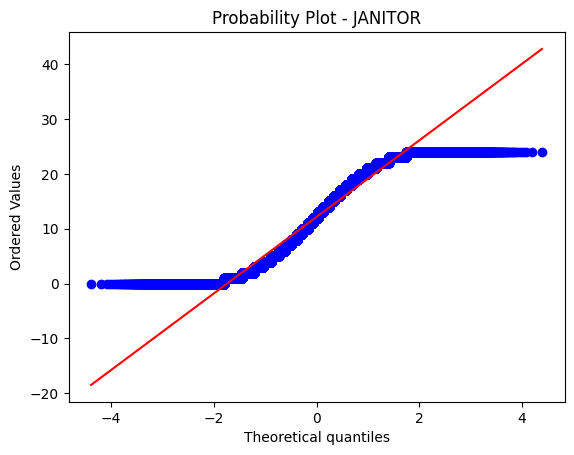

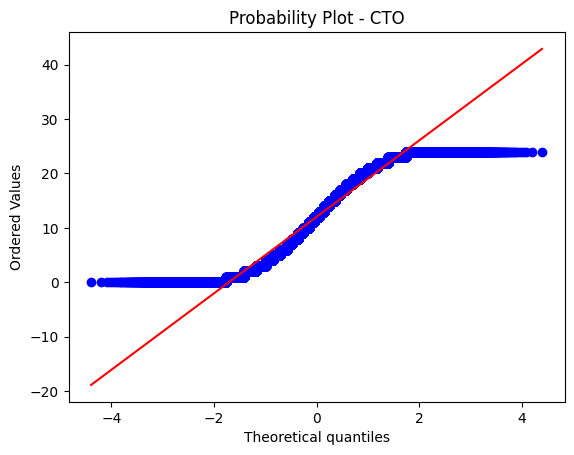

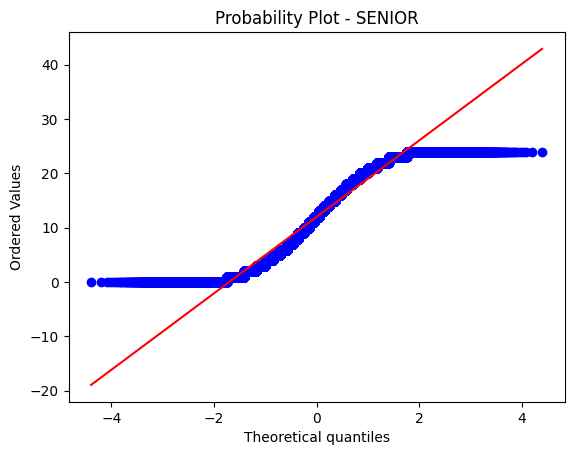

yearsExperience    1.010054
dtype: float64
                                  SS      df          MS         F P-value  \
Source of Variation                                                          
Between Groups           2638.827764       7  376.975395  7.262148     0.0   
Within Groups        51781931.264722  997540   51.909629                     
Total                51784570.092486  997547    51.91191                     

                      F crit  
Source of Variation           
Between Groups       2.28755  
Within Groups                 
Total                         
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 7.262147745370608  and p value is: 9.905482767358365e-09
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 7.262147745370608  and critical value is: 2.2875503809

In [45]:
# perform anova test on jobType and yearsExperience

perform_anova_test('jobType', 'yearsExperience')


        degree  yearsExperience
0    BACHELORS           175495
1     DOCTORAL           175362
2  HIGH_SCHOOL           235769
3      MASTERS           175310
4         NONE           235612


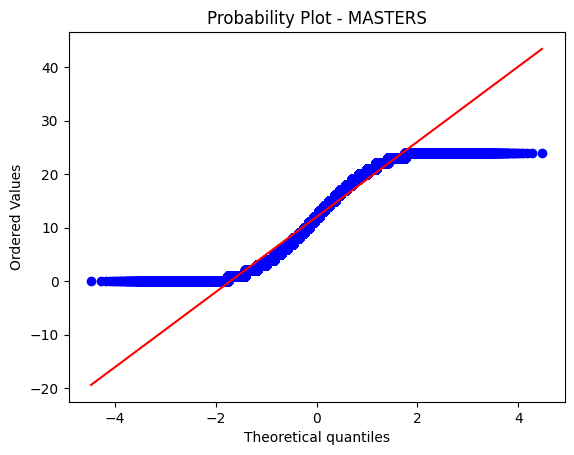

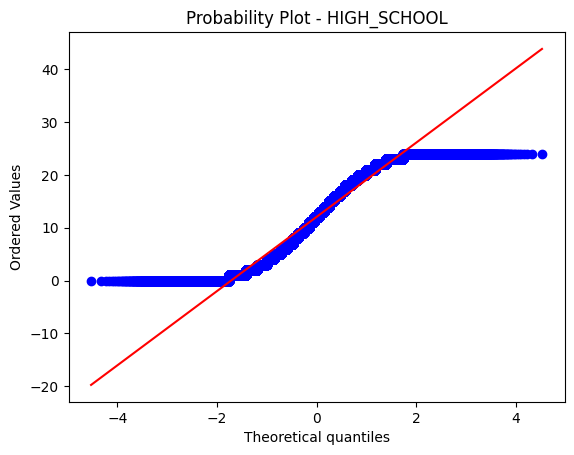

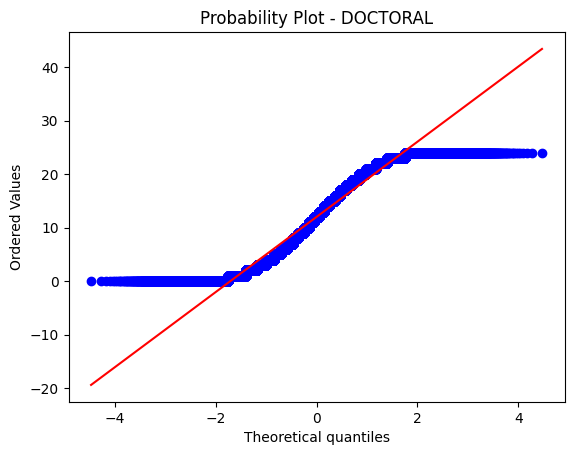

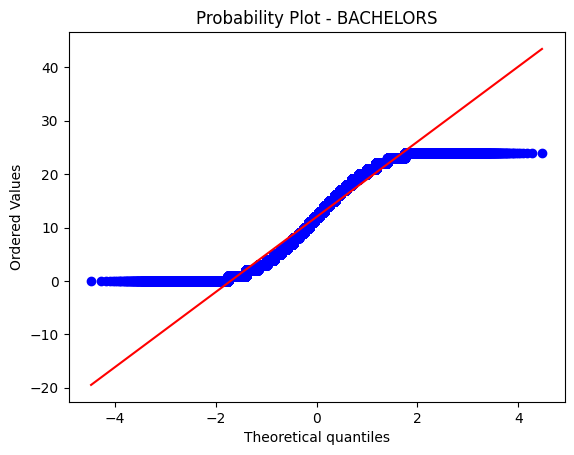

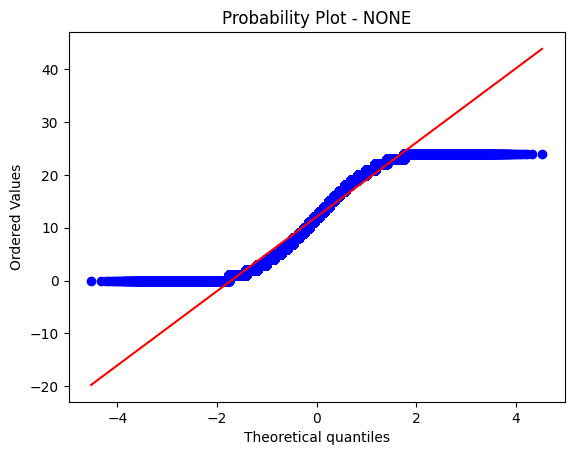

yearsExperience    1.003202
dtype: float64
                                  SS      df          MS         F  P-value  \
Source of Variation                                                           
Between Groups            667.587348       4  166.896837  3.215029  0.01198   
Within Groups        51783902.505138  997543   51.911449                      
Total                51784570.092486  997547    51.91191                      

                       F crit  
Source of Variation            
Between Groups       2.785834  
Within Groups                  
Total                          
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 3.2150294466062923  and p value is: 0.011980261991255126
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 3.2150294466062923  and critical value is: 2

In [46]:
# perform anova test on degree and yearsExperience

perform_anova_test('degree', 'yearsExperience')


         major  yearsExperience
0      BIOLOGY            58379
1     BUSINESS            58518
2    CHEMISTRY            58875
3      COMPSCI            58382
4  ENGINEERING            58594
5   LITERATURE            58684
6         MATH            57800
7         NONE           529906
8      PHYSICS            58410


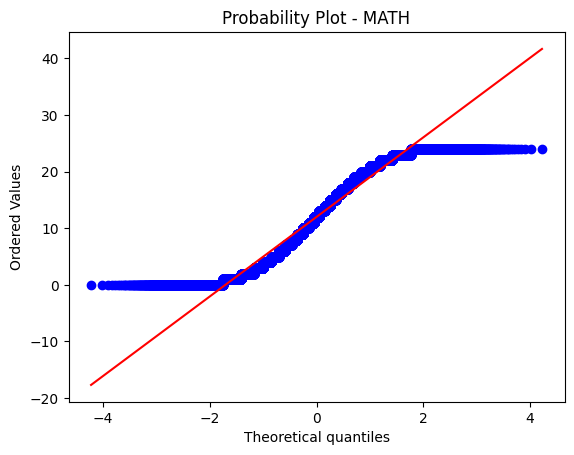

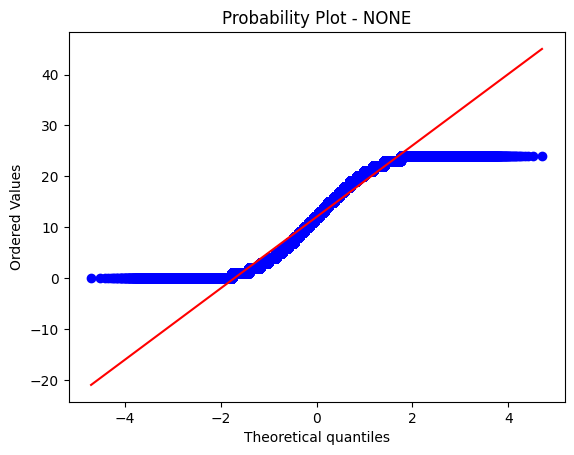

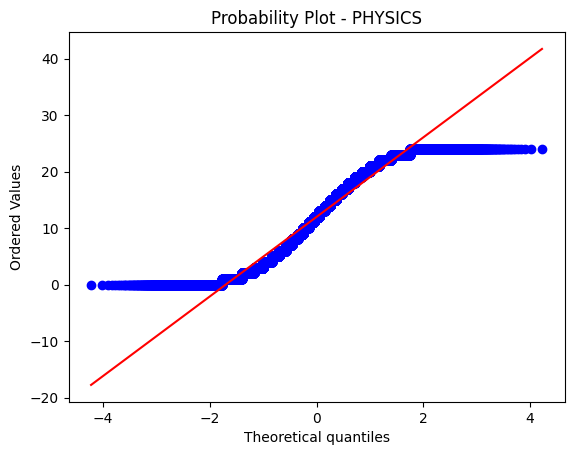

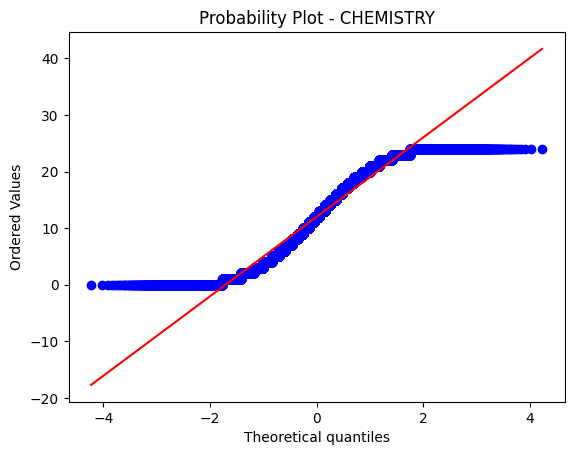

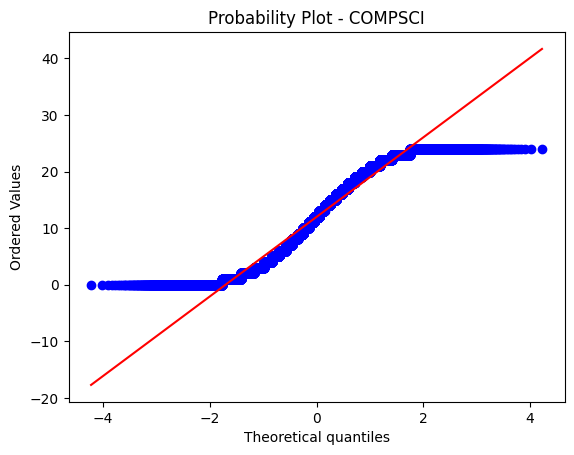

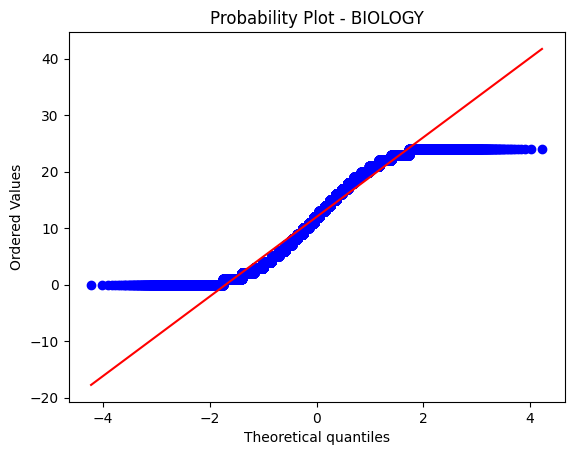

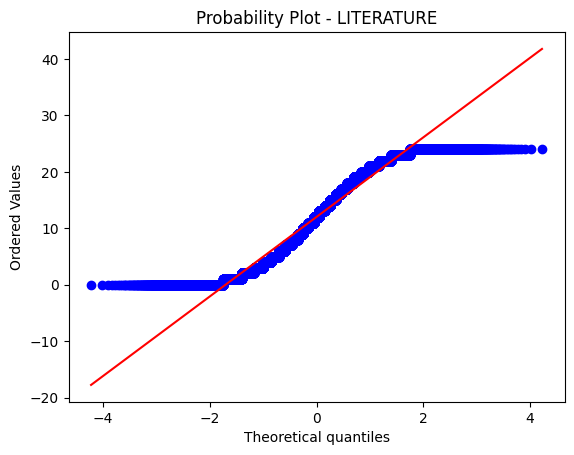

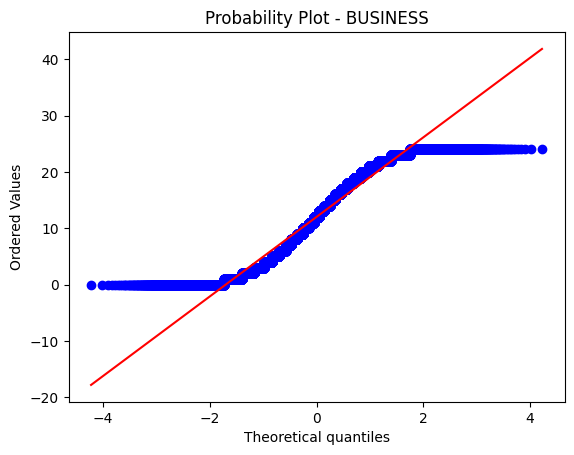

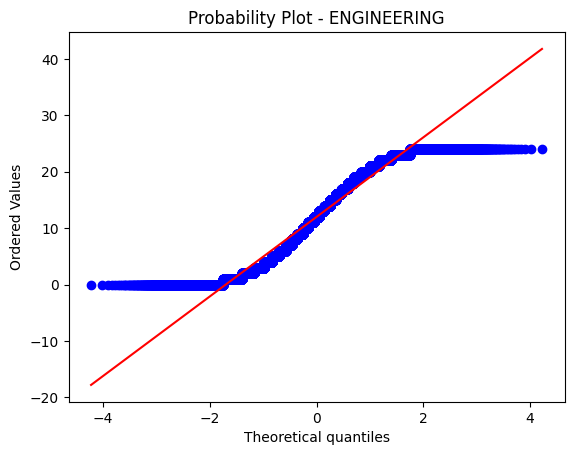

yearsExperience    1.006637
dtype: float64
                                  SS      df         MS         F  P-value  \
Source of Variation                                                          
Between Groups            565.919745       8  70.739968  1.362696  0.20734   
Within Groups         51784004.17274  997539  51.911759                      
Total                51784570.092485  997547   51.91191                      

                       F crit  
Source of Variation            
Between Groups       2.191831  
Within Groups                  
Total                          
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 1.3626964191505286  and p value is: 0.2073404736822877
Failed to reject the null hypothesis.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 1.3626964191505286  and critical value is:

In [47]:
# perform anova test on major and yearsExperience

perform_anova_test('major', 'yearsExperience')


    industry  yearsExperience
0       AUTO           142766
1  EDUCATION           141149
2    FINANCE           142866
3     HEALTH           142736
4        OIL           142770
5    SERVICE           142056
6        WEB           143205


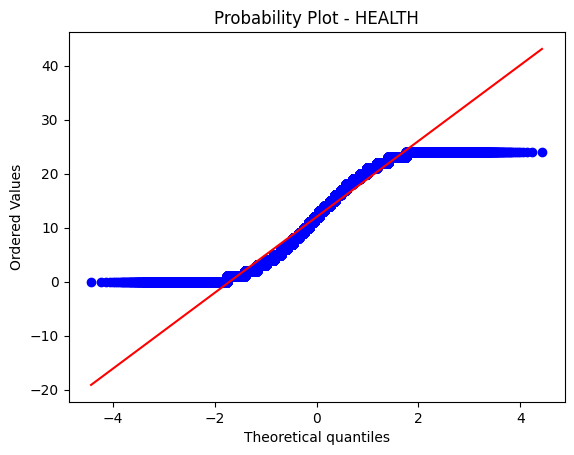

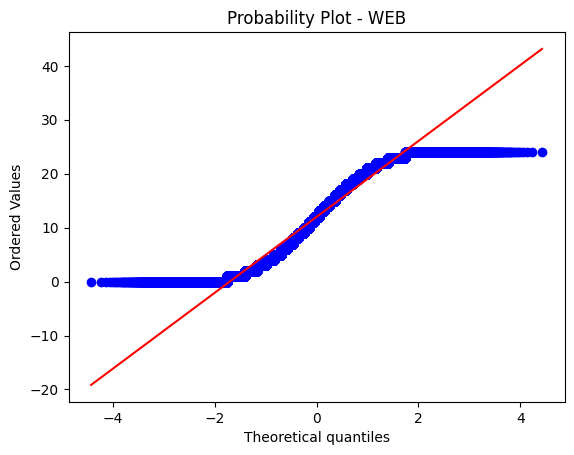

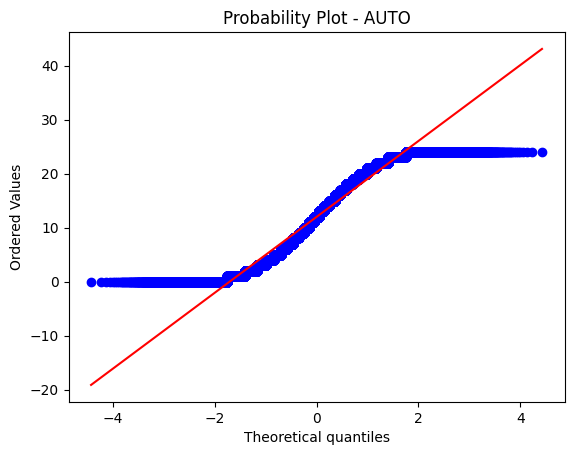

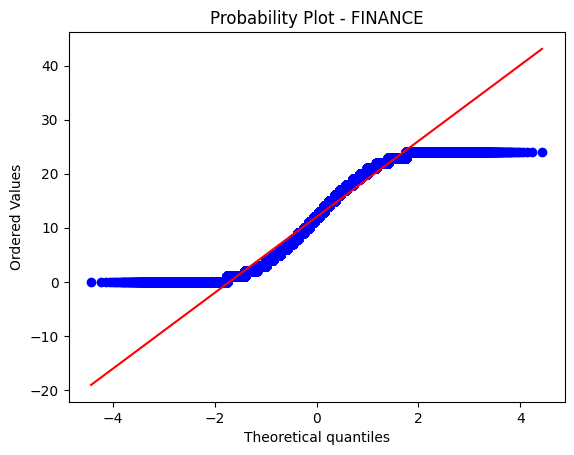

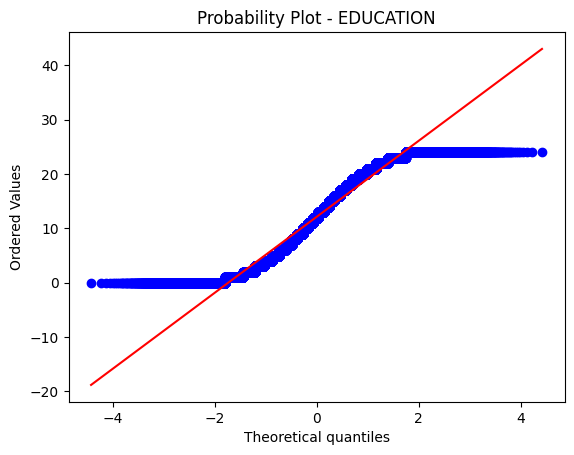

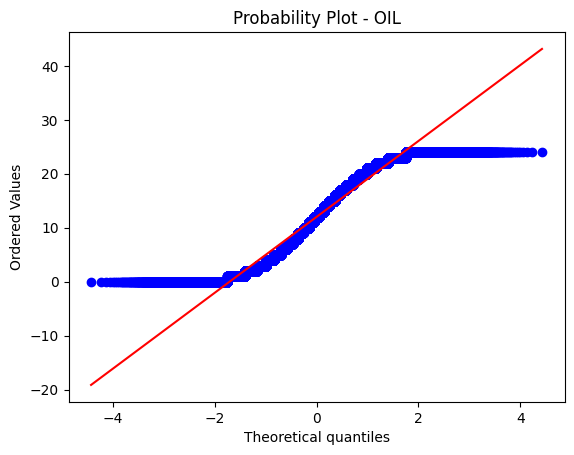

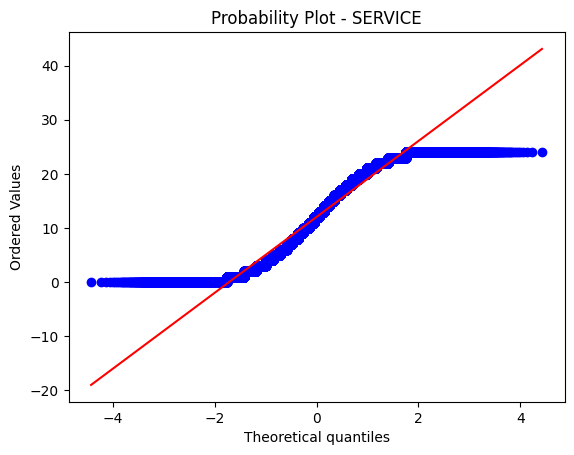

yearsExperience    1.00656
dtype: float64
                                  SS      df          MS         F   P-value  \
Source of Variation                                                            
Between Groups           1692.550226       6  282.091704  5.434191  0.000012   
Within Groups         51782877.54226  997541   51.910526                       
Total                51784570.092486  997547    51.91191                       

                       F crit  
Source of Variation            
Between Groups       2.408242  
Within Groups                  
Total                          
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 5.4341908776699475  and p value is: 1.249142777282053e-05
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 5.4341908776699475  and critical value 

In [48]:
# perform anova test on industry and yearsExperience
perform_anova_test('industry', 'yearsExperience')

## Dendrogram

The dendrogram is a visual representation of the compound correlation data. The individual compounds are arranged along the bottom of the dendrogram and referred to as leaf nodes. Compound clusters are formed by joining individual compounds or existing compound clusters with the join point referred to as a node.

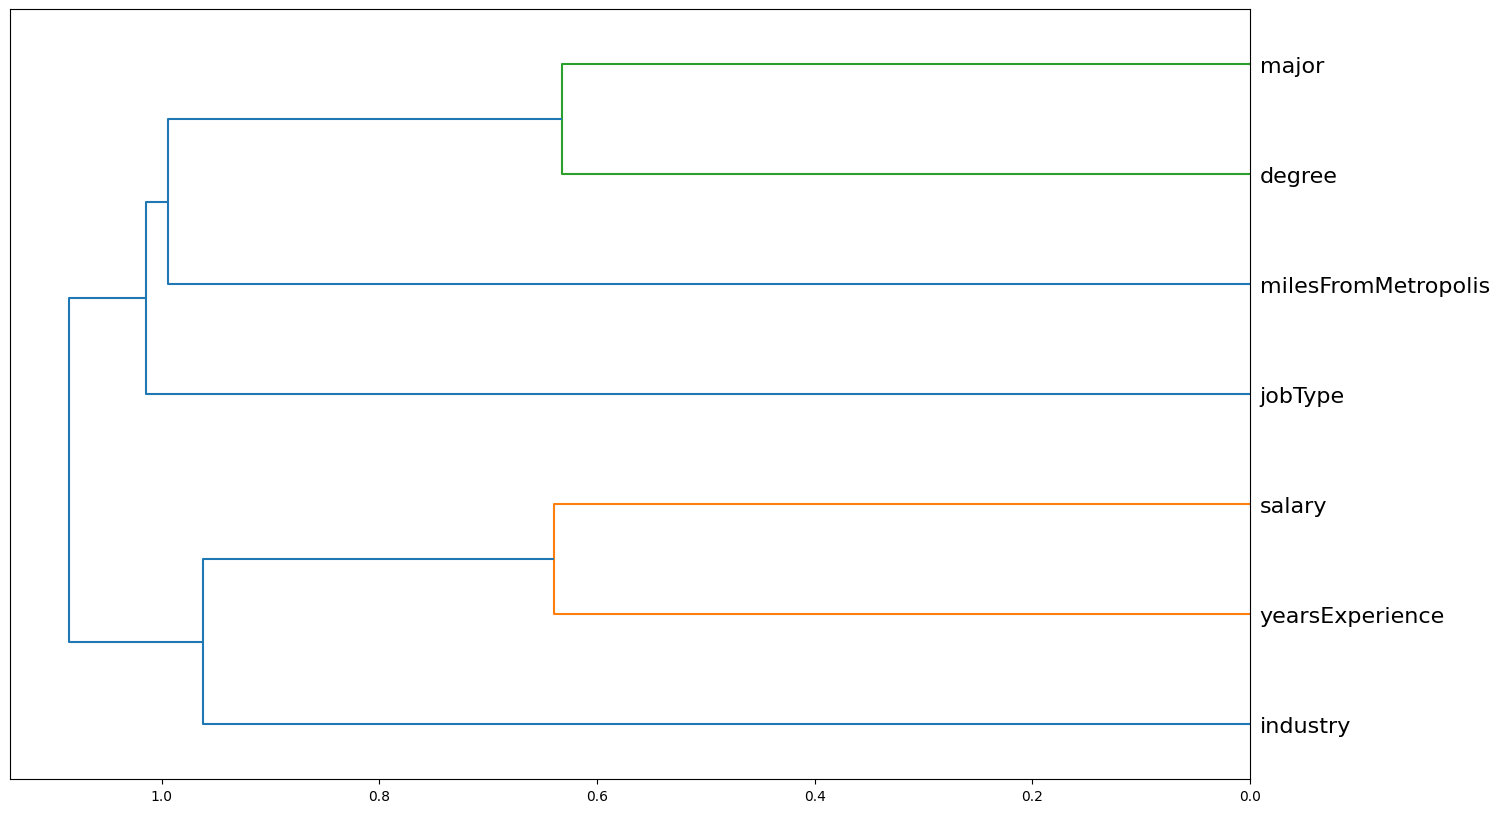

In [49]:
# Plot a Dendrogram on the columns of the dataset (use 50000 sample of 1000000)
X = train_data[1:50000]

import scipy
from scipy.cluster import hierarchy as hc

corr = np.round(scipy.stats.spearmanr(X).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=X.columns, orientation='left', leaf_font_size=16)

plt.show()



observation from dendrogram

Strongly correlated variables:
1. major and degree
2. salary and yearsExperience

## Since, there are no missing values and all the data are distributed equally. We can start converting the categoricl values to numerical.

## Scaling

### Why scaling is necessary?

* Most of the times, your dataset will contain features highly varying in magnitudes, units and range. But since, most of the machine learning algorithms use Euclidean distance between two data points in their computations, this is a problem.
* If left alone, these algorithms only take in the magnitude of features neglecting the units.
* The results would vary greatly between different units, 5kg and 5000gms.
* The features with high magnitudes will weigh in a lot more in the distance calculations than features with low magnitudes.
* To suppress this effect, we need to bring all features to the same level of magnitudes. This can be achieved by scaling.

In [50]:
# Helper function for scaling all the numerical data using MinMaxScalar
from sklearn.preprocessing import MinMaxScaler
def scale_data(df,col):

  scaler = MinMaxScaler()

  df[col] = scaler.fit_transform(df[col])
  return df

In [51]:
# Making a list of the column names to be scaled
col_train = ['yearsExperience','milesFromMetropolis']

# passing data and name for scaling
train_data = scale_data(train_data, col_train)



In [52]:
train_data

jobType       degree      major   industry  yearsExperience  \
0                  CFO      MASTERS       MATH     HEALTH         0.416667   
1                  CEO  HIGH_SCHOOL       NONE        WEB         0.125000   
2       VICE_PRESIDENT     DOCTORAL    PHYSICS     HEALTH         0.416667   
3              MANAGER     DOCTORAL  CHEMISTRY       AUTO         0.333333   
4       VICE_PRESIDENT    BACHELORS    PHYSICS    FINANCE         0.333333   
...                ...          ...        ...        ...              ...   
999995  VICE_PRESIDENT    BACHELORS  CHEMISTRY     HEALTH         0.791667   
999996             CTO  HIGH_SCHOOL       NONE    FINANCE         0.500000   
999997          JUNIOR  HIGH_SCHOOL       NONE  EDUCATION         0.666667   
999998             CFO      MASTERS       NONE     HEALTH         0.250000   
999999          JUNIOR    BACHELORS       NONE  EDUCATION         0.833333   

        milesFromMetropolis  salary  
0                  0.838384     130  
1                  0.737374     101  
2                  0.383838     137  
3                  0.171717     142  
4                  0.161616     163  
...                     ...     ...  
999995             0.949495      88  
999996             0.353535     160  
999997             0.818182      64  
999998             0.050505     149  
999999             0.111111      88  

[997548 rows x 7 columns]

# Modelling

### One-hot-encoding

A one-hot encoding can be applied to the categorical representation. This is where the categorical variable is removed and a new binary variable is added for each unique categorical value.

In [53]:
# Importing OneHotEncoder for encoding the categorical data
from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder

# class for containing all functionality required for OneHotEncoding
class OneHotEncoder(SklearnOneHotEncoder):

    def __init__(self, **kwargs):
        super(OneHotEncoder, self).__init__(**kwargs)
        self.fit_flag = False

    # helper function to fit data
    def fit(self, X, **kwargs):
        out = super().fit(X)
        self.fit_flag = True
        return out

    # helper function to transform data
    def transform(self, X, **kwargs):
        sparse_matrix = super(OneHotEncoder, self).transform(X)
        new_columns = self.get_new_columns(X=X)
        d_out = pd.DataFrame(sparse_matrix.toarray(), columns=new_columns, index=X.index)
        return d_out

    # helper function to fit and transform data
    def fit_transform(self, X, **kwargs):
        self.fit(X)
        return self.transform(X)

    # helper function to get new column names after fitting and tranforming data
    def get_new_columns(self, X):
        new_columns = []
        for i, column in enumerate(X.columns):
            j = 0
            while j < len(self.categories_[i]):
                new_columns.append(f'{column}{self.categories_[i][j]}')
                j += 1
        return new_columns

In [54]:
# Split the labels and the target
train_X = train_data.drop(columns=['salary','yearsExperience','milesFromMetropolis'])
train_Y = train_data['salary']

In [55]:
# Features
train_X.head()



jobType       degree      major industry
0             CFO      MASTERS       MATH   HEALTH
1             CEO  HIGH_SCHOOL       NONE      WEB
2  VICE_PRESIDENT     DOCTORAL    PHYSICS   HEALTH
3         MANAGER     DOCTORAL  CHEMISTRY     AUTO
4  VICE_PRESIDENT    BACHELORS    PHYSICS  FINANCE

In [56]:
# Target
train_Y.head()



0    130
1    101
2    137
3    142
4    163
Name: salary, dtype: int64

In [57]:
# passing features dataframe for one hot encoding process
encoder = OneHotEncoder()
train_X = encoder.fit_transform(train_X)
train_X = train_X.join(train_data['milesFromMetropolis'])
train_X = train_X.join(train_data['yearsExperience'])

train_X.head()


jobTypeCEO  jobTypeCFO  jobTypeCTO  jobTypeJANITOR  jobTypeJUNIOR  \
0         0.0         1.0         0.0             0.0            0.0   
1         1.0         0.0         0.0             0.0            0.0   
2         0.0         0.0         0.0             0.0            0.0   
3         0.0         0.0         0.0             0.0            0.0   
4         0.0         0.0         0.0             0.0            0.0   

   jobTypeMANAGER  jobTypeSENIOR  jobTypeVICE_PRESIDENT  degreeBACHELORS  \
0             0.0            0.0                    0.0              0.0   
1             0.0            0.0                    0.0              0.0   
2             0.0            0.0                    1.0              0.0   
3             1.0            0.0                    0.0              0.0   
4             0.0            0.0                    1.0              1.0   

   degreeDOCTORAL  ...  majorPHYSICS  industryAUTO  industryEDUCATION  \
0             0.0  ...           0.0           0.0                0.0   
1             0.0  ...           0.0           0.0                0.0   
2             1.0  ...           1.0           0.0                0.0   
3             1.0  ...           0.0           1.0                0.0   
4             0.0  ...           1.0           0.0                0.0   

   industryFINANCE  industryHEALTH  industryOIL  industrySERVICE  industryWEB  \
0              0.0             1.0          0.0              0.0          0.0   
1              0.0             0.0          0.0              0.0          1.0   
2              0.0             1.0          0.0              0.0          0.0   
3              0.0             0.0          0.0              0.0          0.0   
4              1.0             0.0          0.0              0.0          0.0   

   milesFromMetropolis  yearsExperience  
0             0.838384         0.416667  
1             0.737374         0.125000  
2             0.383838         0.416667  
3             0.171717         0.333333  
4             0.161616         0.333333  

[5 rows x 31 columns]

In [58]:
train_X.columns

Index(['jobTypeCEO', 'jobTypeCFO', 'jobTypeCTO', 'jobTypeJANITOR',
       'jobTypeJUNIOR', 'jobTypeMANAGER', 'jobTypeSENIOR',
       'jobTypeVICE_PRESIDENT', 'degreeBACHELORS', 'degreeDOCTORAL',
       'degreeHIGH_SCHOOL', 'degreeMASTERS', 'degreeNONE', 'majorBIOLOGY',
       'majorBUSINESS', 'majorCHEMISTRY', 'majorCOMPSCI', 'majorENGINEERING',
       'majorLITERATURE', 'majorMATH', 'majorNONE', 'majorPHYSICS',
       'industryAUTO', 'industryEDUCATION', 'industryFINANCE',
       'industryHEALTH', 'industryOIL', 'industrySERVICE', 'industryWEB',
       'milesFromMetropolis', 'yearsExperience'],
      dtype='object')

In [59]:
#importing Sklearn library for spliting train dataset into train and test dataset(size=0.2)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=1)

In [60]:
# importing necessary libraries for geting metrics of models
import math
import sklearn.metrics as metrics
from sklearn.metrics import median_absolute_error, mean_absolute_error

# Function for calculating RMSE
def rmse(x,y):
  return math.sqrt(((x-y)**2).mean())


# Function for calculating all the relevant metrics
def print_score(m):
    res = [
        rmse(m.predict(X_train), Y_train), rmse(m.predict(X_test), Y_test),
        m.score(X_train, Y_train), m.score(X_test, Y_test),
        median_absolute_error(m.predict(X_train), Y_train), median_absolute_error(m.predict(X_test), Y_test),
        mean_absolute_error(m.predict(X_train), Y_train), mean_absolute_error(m.predict(X_test), Y_test)
    ]




    print("RMSE-Train: " + str(res[0]) + "\nRMSE-Test: " + str(res[1]) + "\nScore-Train: " + str(res[2]) + "\nScore-Test: " + str(res[3]) +
         "\nMedAE-Train: " + str(res[4]) + "\nMedAE-Test: " + str(res[5]) + "\nMeanAE-Train: " + str(res[6]) + "\nMeanAE-Test: " + str(res[7]),'\n')


In [61]:
# Visualize importance of all the features in the dataset for the prediction

def visualize_importance(feature_importances, feat_train_df):

    # creating dataframe for feature name and feature importance
    feature_importance_df = pd.DataFrame()

    _df = pd.DataFrame()
    _df['feature_importance'] = feature_importances
    _df['column'] = feat_train_df.columns
    feature_importance_df = pd.concat([feature_importance_df, _df], axis=0, ignore_index=True)


    # grouping all data and sorting in descending order
    order = feature_importance_df.groupby('column').sum()[['feature_importance']]\
            .sort_values('feature_importance', ascending=False).index[:50]


    # ploting feature importance data using boxenplot
    fig, ax = plt.subplots(figsize=(6, max(6, len(order) * .25)))

    sns.boxenplot(data= feature_importance_df,
                  x = 'feature_importance',
                  y='column',
                  order = order,
                  ax = ax,
                  palette = 'viridis',
                  orient = 'h')
    ax.tick_params(axis='x', rotation= 0)
    ax.set_title('Importance')
    ax.grid()
    fig.tight_layout()
    return fig, ax



### NOTE:
The employee salaries dataset has 1000000 samples.

We have used only 50000 samples for training.

If you want you can use complete dataset.

Using complete dataset will take longer time to train the model.

### Linear Regression

RMSE-Train: 19.628793950279913
RMSE-Test: 19.63828849582936
Score-Train: 0.7400878531693933
Score-Test: 0.7405895995565882
MedAE-Train: 13.75
MedAE-Test: 13.75
MeanAE-Train: 15.870198536911776
MeanAE-Test: 15.876495539070723 

None
CPU times: user 731 ms, sys: 401 ms, total: 1.13 s
Wall time: 767 ms


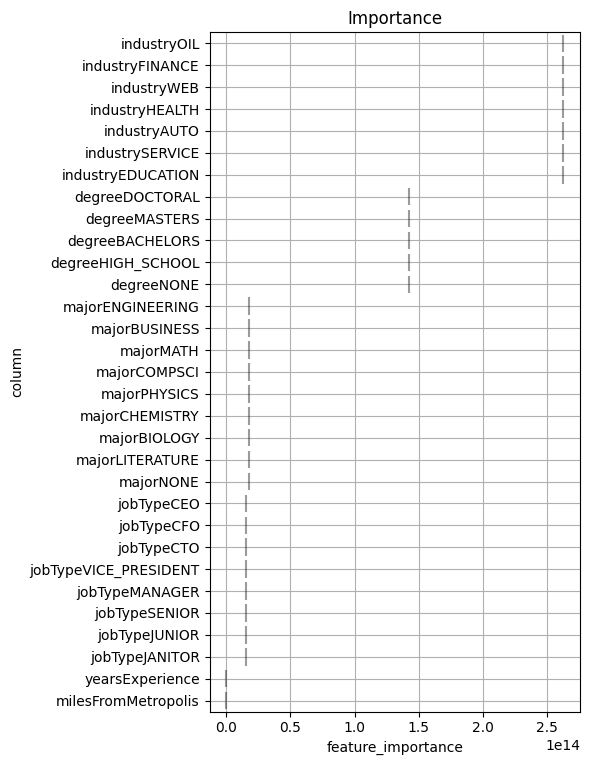

In [62]:
%%time
# Fit a Linear Regression model to the train dataset

# Import LinearRegressor
from sklearn.linear_model import LinearRegression

# Instantiate the model
lModel = LinearRegression()


# Fit the model to the data

lModel.fit(X_train[:50000], Y_train[:50000])


# print score of the model

print(print_score(lModel))


# visualizing the inportance of features.
fig, ax = visualize_importance(lModel.coef_, train_X)




### Random Forest Regressor

Random forest is a flexible, easy to use machine learning algorithm that produces, even without hyper-parameter tuning, a great result most of the time. It is also one of the most used algorithms, because of its simplicity and diversity.

RMSE-Train: 20.0317160344091
RMSE-Test: 20.554660868823163
Score-Train: 0.729307854424015
Score-Test: 0.7158152662539501
MedAE-Train: 13.099999999999994
MedAE-Test: 13.969166666666666
MeanAE-Train: 15.828134070728096
MeanAE-Test: 16.439044828321453 

None
CPU times: user 2min 31s, sys: 545 ms, total: 2min 32s
Wall time: 2min 32s


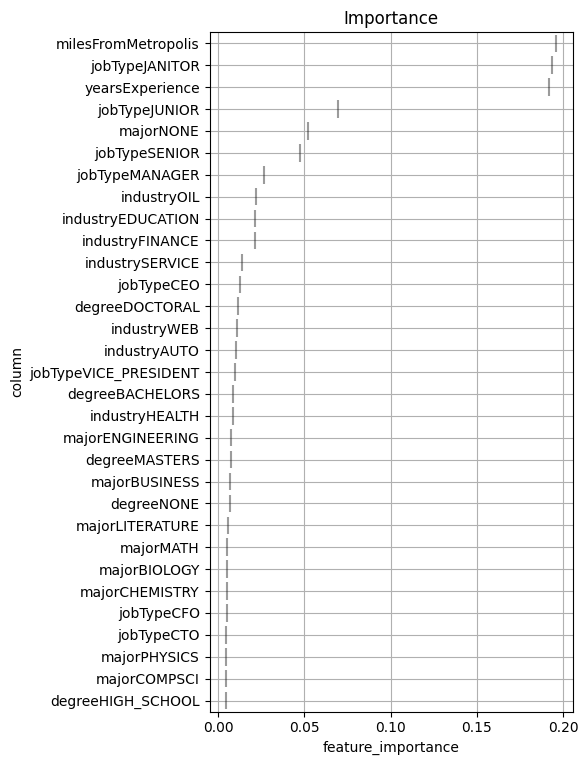

In [63]:
%%time
# Fit a Random Forest Regressor model to the train dataset

# Import RandomForrestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate the model
rf = RandomForestRegressor()


# Fit the model to the data

rf.fit(X_train[:50000], Y_train[:50000])


# print score of the model

print(print_score(rf))


# visualizing the inportance of features.
fig, ax = visualize_importance(rf.feature_importances_, train_X)


In [64]:
('jobTypeCTO', 'degreeMASTERS', 'majorBIOLOGY', 'industryHEALTH',9,17)

('jobTypeCTO', 'degreeMASTERS', 'majorBIOLOGY', 'industryHEALTH', 9, 17)

### KNeighbors Regressor

KNN regression is a non-parametric method that, in an intuitive manner, approximates the association between independent variables and the continuous outcome by averaging the observations in the same neighbourhood. The size of the neighbourhood needs to be set by the analyst or can be chosen using cross-validation to select the size that minimises the mean-squared error.

### Note:
For KNN we used only 10000 samples out of 1000000.
You can use complete dataset if you want, it will take longer time to train the model.

In [65]:
%%time
# Fit a K-Neighbour Regressor model to the train dataset

# Import KNeighbourRegressor
from sklearn.neighbors import KNeighborsRegressor

# Instantiate the model
knnr = KNeighborsRegressor()

# Fit the model to the data

knnr.fit(X_train[:1000], Y_train[:1000])

# print score of the model

print(print_score(knnr))

# visualizing the inportance of features.
#fig, ax = visualize_importance(knnr.f, train_X)



RMSE-Train: 26.55133885403134
RMSE-Test: 26.54033127338556
Score-Train: 0.5244324700829575
Score-Test: 0.5262024710236792
MedAE-Train: 17.400000000000006
MedAE-Test: 17.400000000000006
MeanAE-Train: 20.90524160503635
MeanAE-Test: 20.873122149265704 

None
CPU times: user 49.2 s, sys: 391 ms, total: 49.6 s
Wall time: 30.5 s


### Gradient Boosting Regressor

Gradient Boosting Algorithm is generally used when we want to decrease the Bias error.
it builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function.

RMSE-Train: 19.45241186305209
RMSE-Test: 19.467044812093597
Score-Train: 0.744737947647806
Score-Test: 0.7450939343847691
MedAE-Train: 13.682280609323286
MedAE-Test: 13.701733249742617
MeanAE-Train: 15.71818221900571
MeanAE-Test: 15.73310650965175 

None
CPU times: user 14.8 s, sys: 303 ms, total: 15.1 s
Wall time: 15.1 s


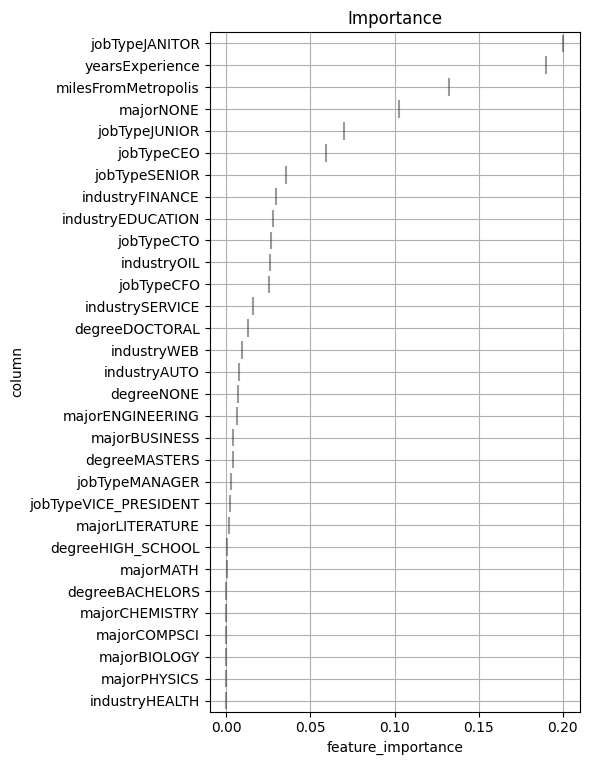

In [66]:
%%time
# Fit a Gradient Boosting Regressor model to the train dataset

# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate the model
GBR = GradientBoostingRegressor()

# Fit the model to the data

GBR.fit(X_train[:50000], Y_train[:50000])

# print score of the model

print(print_score(GBR))

# visualizing the inportance of features.
fig, ax = visualize_importance(GBR.feature_importances_, train_X[:50000])

### DecisionTree Regressor

Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes

RMSE-Train: 26.91818753284484
RMSE-Test: 27.712841927323833
Score-Train: 0.5112002522777466
Score-Test: 0.48341446435297153
MedAE-Train: 16.0
MedAE-Test: 17.0
MeanAE-Train: 20.324553049687697
MeanAE-Test: 21.59511386229596 

None
CPU times: user 2.12 s, sys: 168 ms, total: 2.29 s
Wall time: 2.21 s


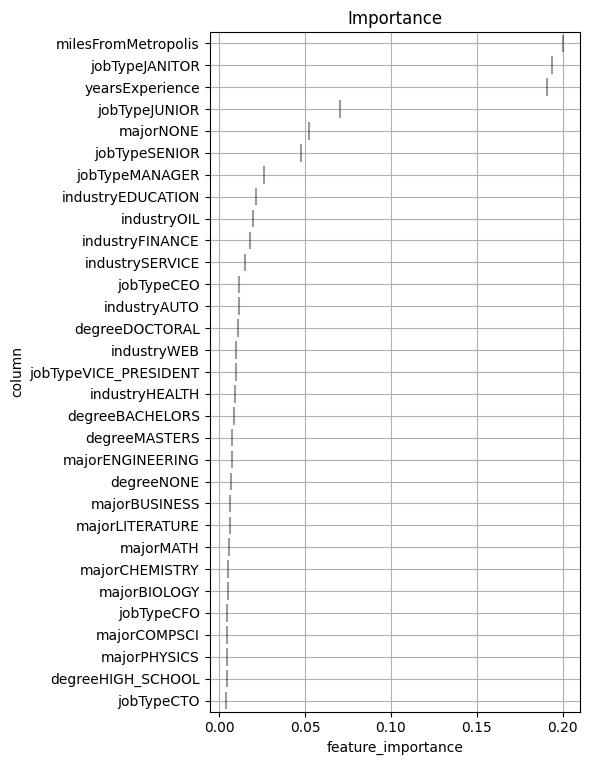

In [67]:
%%time
# Fit a Decision Tree Regressor model to the train dataset

# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# Instantiate the model
DTR = DecisionTreeRegressor()

# Instantiate the model
DTR.fit(X_train[:50000], Y_train[:50000])

# print score of the model

print(print_score(DTR))

# visualizing the inportance of features.
fig, ax = visualize_importance(DTR.feature_importances_, train_X[:50000])


### AdaBoost Regressor

An AdaBoost regressor is a meta-estimator that begins by fitting a regressor on the original dataset and then fits additional copies of the regressor on the same dataset but where the weights of instances are adjusted according to the error of the current prediction

RMSE-Train: 25.102503620396586
RMSE-Test: 25.151121624361117
Score-Train: 0.57491730922875
Score-Test: 0.5745046411099088
MedAE-Train: 19.189792484576543
MedAE-Test: 19.25428769299711
MeanAE-Train: 20.90413463945645
MeanAE-Test: 20.946782632472228 

None
CPU times: user 29.9 s, sys: 5.94 s, total: 35.8 s
Wall time: 36 s


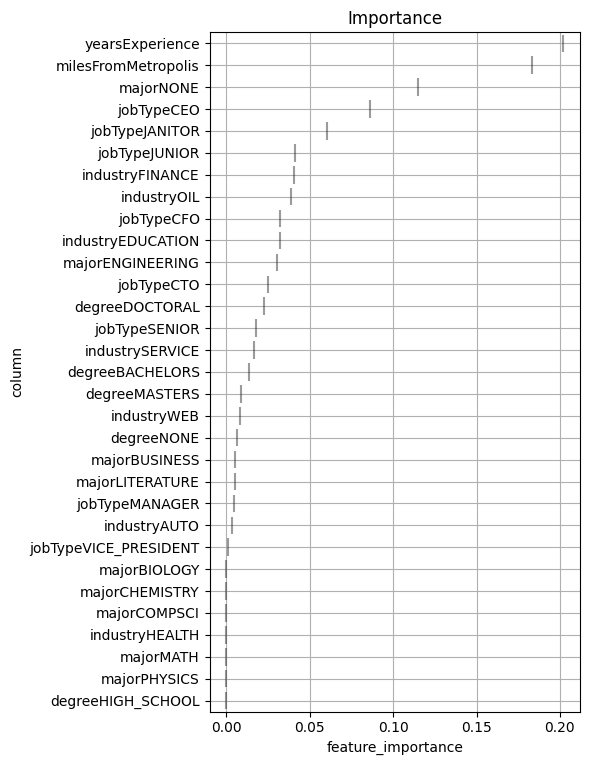

In [68]:
%%time
# Fit a AdaBoost Regressor model to the train dataset

# Import AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor

# Instantiate the model
AdaBoost = AdaBoostRegressor()

# Instantiate the model
AdaBoost.fit(X_train[:50000], Y_train[:50000])

# print score of the model

print(print_score(AdaBoost))

# visualizing the inportance of features.
fig, ax = visualize_importance(AdaBoost.feature_importances_, train_X[:50000])


### XGBoost

XGBoost is an ensemble learning method. Sometimes, it may not be sufficient to rely upon the results of just one machine learning model. Ensemble learning offers a systematic solution to combine the predictive power of multiple learners. The resultant is a single model which gives the aggregated output from several models.

RMSE-Train: 19.304095919574166
RMSE-Test: 19.43929008458734
Score-Train: 0.7486156263410748
Score-Test: 0.7458202701025256
MedAE-Train: 13.460857391357422
MedAE-Test: 13.568061828613281
MeanAE-Train: 15.580948246854556
MeanAE-Test: 15.694779342262077 

None
CPU times: user 30.7 s, sys: 144 ms, total: 30.9 s
Wall time: 18.3 s


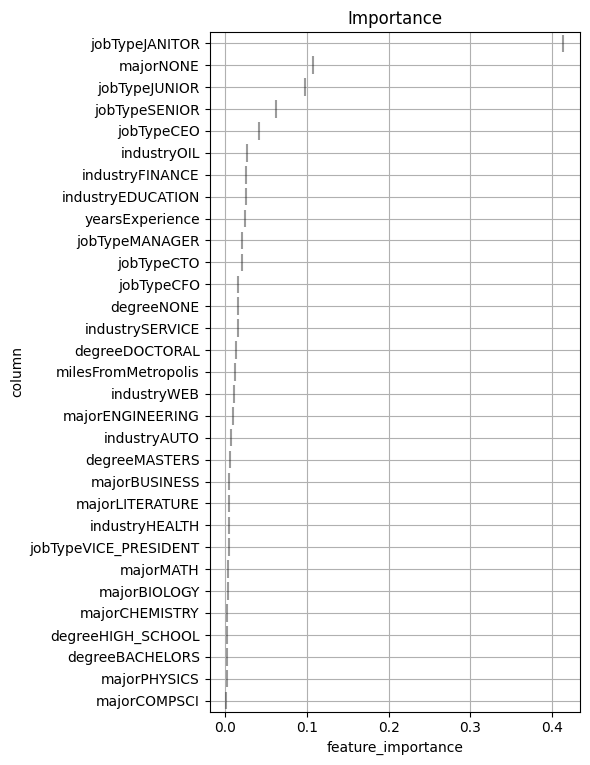

In [69]:
%%time
# Fit a XGB Regressor model to the train dataset

# Import XGBRegressor
from xgboost import XGBRegressor

# Instantiate the model
xgbr = XGBRegressor()

xgbr.fit(X_train[:50000], Y_train[:50000])

# print score of the model

print(print_score(xgbr))

# visualizing the inportance of features.
fig, ax = visualize_importance(xgbr.feature_importances_, train_X[:50000])


### Light Gradient Boosted Machine

Light GBM is a fast, distributed, high-performance gradient boosting framework based on decision tree algorithm, used for ranking, classification and many other machine learning tasks.

RMSE-Train: 19.035516952045676
RMSE-Test: 19.06996805226322
Score-Train: 0.7555620148174362
Score-Test: 0.7553867129578067
MedAE-Train: 13.428121303884073
MedAE-Test: 13.475762859175305
MeanAE-Train: 15.437509527700893
MeanAE-Test: 15.465117672406471 

None
CPU times: user 37.8 s, sys: 511 ms, total: 38.3 s
Wall time: 24.2 s


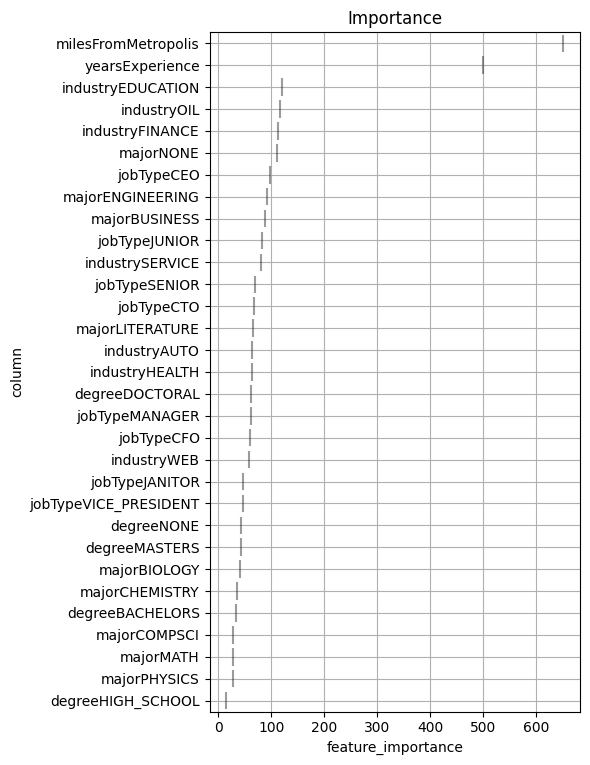

In [70]:
%%time
# Fit a lightgbm Regressor model to the train dataset
# Import lightgbm
import lightgbm as lgbm

# Instantiate the model
lg =lgbm.LGBMRegressor()
lg.fit(X_train[:50000], Y_train[:50000])

# print score of the model

print(print_score(lg))

# visualizing the inportance of features.
fig, ax = visualize_importance(lg.feature_importances_, train_X[:50000])




### Comparing all the model based on metric

In [71]:
# the libraries we need
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
def compare_models(models,names,X_train,y_train,X_test,y_test):


    # now, create a list with the objects
    data = {'Metric':['rmse','MedAE','MAE','R-squared']}
    df_train = pd.DataFrame(data)
    df_test = pd.DataFrame(data)

    def rmse(x,y):
      return math.sqrt(((x-y)**2).mean())


    for (model,name) in zip(models,names):
      y_pred= model.predict(X_test) # then predict on the test set
      res = [rmse(model.predict(X_train), y_train),rmse(model.predict(X_test), y_test),
                metrics.median_absolute_error(model.predict(X_train), y_train),metrics.median_absolute_error(model.predict(X_test), y_test),
                metrics.mean_absolute_error(model.predict(X_train), y_train),metrics.mean_absolute_error(model.predict(X_test), y_test),
                metrics.r2_score(model.predict(X_train), y_train),metrics.r2_score(model.predict(X_test), y_test)]
      df_train[name] = [res[0], res[2], res[4], res[6]]
      df_test[name] = [res[1], res[3], res[5], res[7]]
    return df_train,df_test

In [72]:
# list of models object
# list of models name
models= [lg, DTR, rf, knnr, GBR, xgbr, AdaBoost]
names = ['Lr', 'Dtree', 'Forest', 'Knn','GBR', 'Xboost', 'AdaBoost']
comp_model_train,comp_model_test = compare_models(models,names,X_train,Y_train,X_test,Y_test)

#### RMSE of all model on train and test data

In [73]:
# printing rmse comparision of model on train and test
print('Train res:',comp_model_train[:1])
print('Test res:', comp_model_test[:1])


Train res:   Metric         Lr      Dtree     Forest        Knn        GBR     Xboost  \
0   rmse  19.035517  26.918188  20.031716  26.551339  19.452412  19.304096   

    AdaBoost  
0  25.102504  
Test res:   Metric         Lr      Dtree     Forest        Knn        GBR    Xboost  \
0   rmse  19.069968  27.712842  20.554661  26.540331  19.467045  19.43929   

    AdaBoost  
0  25.151122  


#### All metrics on train and test data

In [74]:
# printing comparision of model on train and test
print('Result on Test data')
print(comp_model_test)
print('Result on Train data')
print(comp_model_train)

Result on Test data
      Metric         Lr      Dtree     Forest        Knn        GBR  \
0       rmse  19.069968  27.712842  20.554661  26.540331  19.467045   
1      MedAE  13.475763  17.000000  13.969167  17.400000  13.701733   
2        MAE  15.465118  21.595114  16.439045  20.873122  15.733107   
3  R-squared   0.673279   0.493134   0.634223   0.179172   0.608275   

      Xboost   AdaBoost  
0  19.439290  25.151122  
1  13.568062  19.254288  
2  15.694779  20.946783  
3   0.670073   0.119825  
Result on Train data
      Metric         Lr      Dtree     Forest        Knn        GBR  \
0       rmse  19.035517  26.918188  20.031716  26.551339  19.452412   
1      MedAE  13.428121  16.000000  13.100000  17.400000  13.682281   
2        MAE  15.437510  20.324553  15.828134  20.905242  15.718182   
3  R-squared   0.673616   0.520440   0.653817   0.176948   0.607737   

      Xboost   AdaBoost  
0  19.304096  25.102504  
1  13.460857  19.189792  
2  15.580948  20.904135  
3   0.674120 

## Hyperparameter Tunning

A hyperparameter is a parameter whose value is set before the learning process begins.

Hyperparameters tuning is crucial as they control the overall behavior of a machine learning model.

Every machine learning models will have different hyperparameters that can be set.

### RamdomizedSearchCV

RandomizedSearchCV is very useful when we have many parameters to try and the training time is very long.
 1. The first step is to write the parameters that we want to consider
 2. From these parameters select the best ones.(which are printed in output)

In [75]:
# Helper function to perform hyper parameter tunning with RandomizedSearchCV
def random_Search(model,X_train, Y_train,param_grid):
  from sklearn.model_selection import RandomizedSearchCV

  # Random search of parameters, using 3 fold cross validation,
  # search across 100 different combinations, and use all available cores
  random = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=20, cv=3, verbose=2, random_state=42, n_jobs=-1)

  random.fit(X_train[:50000], Y_train[:50000])

  print(random.best_params_)


In [76]:

# for i in np.linspace(1, 32, 32, endpoint=True):
#   #print(i)
#   print(int(i))
num = [int(i) for i in np.linspace(1, 32, 32, endpoint=True)]
print(num)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]


In [77]:
# create parameters dict for tunning
rf_para_grid = {'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [int(i) for i in np.linspace(1, 32, 32, endpoint=True)],
               'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True),
               'bootstrap': [True, False]}

# passing data for hyper parameter tunning with Randomized search cv

random_Search(RandomForestRegressor(), X_train, Y_train, param_grid=rf_para_grid)



Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'n_estimators': 64, 'min_samples_leaf': 0.1, 'max_features': 'auto', 'max_depth': 27, 'bootstrap': False}


In [78]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# create GradientBoostRegressor parameters dict for tunning
GBR_para_grid = {
'n_estimators':  [1, 2, 4, 8, 16, 32, 64, 100, 200],
 'learning_rate' : [1, 0.5, 0.25, 0.1, 0.05, 0.01],
 'max_depth': [int(i) for i in np.linspace(1, 32, 32, endpoint=True)],
 'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True)
}

# passing data for hyper parameter tunning with Randomized search cv

random_Search(GradientBoostingRegressor(), X_train, Y_train, param_grid=GBR_para_grid)



Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'n_estimators': 64, 'min_samples_split': 0.1, 'max_depth': 8, 'learning_rate': 0.25}


In [79]:
# create DecisionTreeRegressor parameters dict for tunning
DTR_para_grid = {
                  "splitter":["best","random"],
            "max_depth" : [int(i) for i in np.linspace(1, 32, 32, endpoint=True)],
           "min_samples_leaf":np.linspace(0.1, 0.5, 5, endpoint=True),
           "min_weight_fraction_leaf":[0.1,0.2,0.5,0.9],
           "max_features":["auto","log2","sqrt",None],
           }

# passing data for hyper parameter tunning with Randomized search cv

random_Search(DecisionTreeRegressor(), X_train, Y_train, param_grid=DTR_para_grid)



Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'splitter': 'random', 'min_weight_fraction_leaf': 0.2, 'min_samples_leaf': 0.2, 'max_features': None, 'max_depth': 20}


In [80]:
from xgboost import XGBRegressor


# create parameters dict for tunning
XGB_para_grid = {
    "learning_rate"    : [0.05, 0.10, 0.15] ,
 "max_depth"        : range(3,10,2),
 "min_child_weight" : range(1,6,2),
 "gamma"            : [ 0.0, 0.1, 0.2 ],
 "colsample_bytree" : [ 0.3, 0.4]
 }

# passing data for hyper parameter tunning with Randomized search cv

random_Search(XGBRegressor(), X_train, Y_train, param_grid=XGB_para_grid)



Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.15, 'gamma': 0.1, 'colsample_bytree': 0.4}


## Using the best parameters and training the models

### Random Forest Regressor

RMSE-Train: 30.138222497739672
RMSE-Test: 30.14304173683383
Score-Train: 0.38726228348062464
Score-Test: 0.38884092853111696
MedAE-Train: 20.58499377335005
MedAE-Test: 20.606941560367744
MeanAE-Train: 24.128107182154466
MeanAE-Test: 24.155169904265 

None
CPU times: user 14.9 s, sys: 215 ms, total: 15.1 s
Wall time: 15.2 s


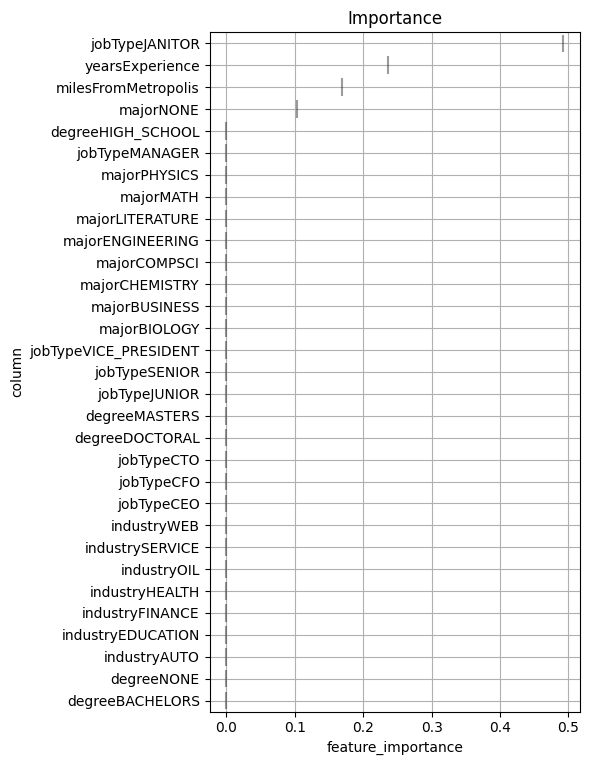

In [81]:

%%time
from matplotlib.pylab import ma
# Fit a Random Forest Regressor model to the train dataset
from sklearn.ensemble import RandomForestRegressor
# Instantiate the model
rf= RandomForestRegressor(n_estimators=64, min_samples_leaf=0.1, max_features='auto', max_depth=27, bootstrap=False)


# Fit the model to the data

rf.fit(X_train[:50000], Y_train[:50000])

# print score of the model
print(print_score(rf))


# visualizing the inportance of features.
fig, ax = visualize_importance(rf.feature_importances_, train_X[:50000])




### Gradient Boosting Regressor

RMSE-Train: 19.145753169588712
RMSE-Test: 19.169559520534044
Score-Train: 0.7527226969280578
Score-Test: 0.7528250926000979
MedAE-Train: 13.472909975483127
MedAE-Test: 13.49664633889737
MeanAE-Train: 15.519996927993063
MeanAE-Test: 15.538617160731063 

None
CPU times: user 16.5 s, sys: 299 ms, total: 16.8 s
Wall time: 16.8 s


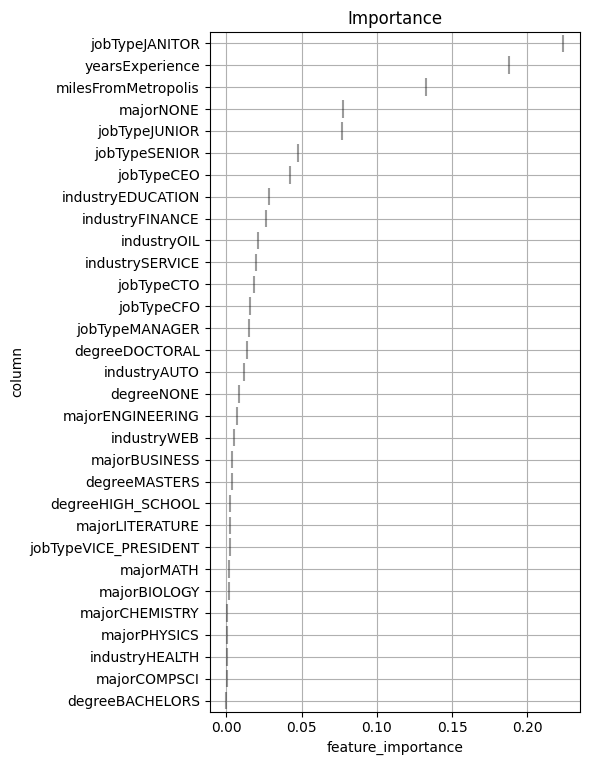

In [82]:
%%time
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Fit a Gradient Boosting Regressor model to the train dataset

# Instantiate the model
GBR = GradientBoostingRegressor(n_estimators=64, min_samples_split=0.1, max_depth=8, learning_rate=0.25)

# Fit the model to the data

GBR.fit(X_train[:50000], Y_train[:50000])

# print score of the model
print(print_score(GBR))


# visualizing the inportance of features.
fig, ax = visualize_importance(GBR.feature_importances_, train_X[:50000])


### Decision Tree Regrsessor

RMSE-Train: 35.11045409437076
RMSE-Test: 35.1141557471695
Score-Train: 0.16840429629180786
Score-Test: 0.17063715591351203
MedAE-Train: 24.444477599215645
MedAE-Test: 24.45268865793041
MeanAE-Train: 28.252010150452662
MeanAE-Test: 28.258602382883033 

None
CPU times: user 552 ms, sys: 164 ms, total: 715 ms
Wall time: 627 ms


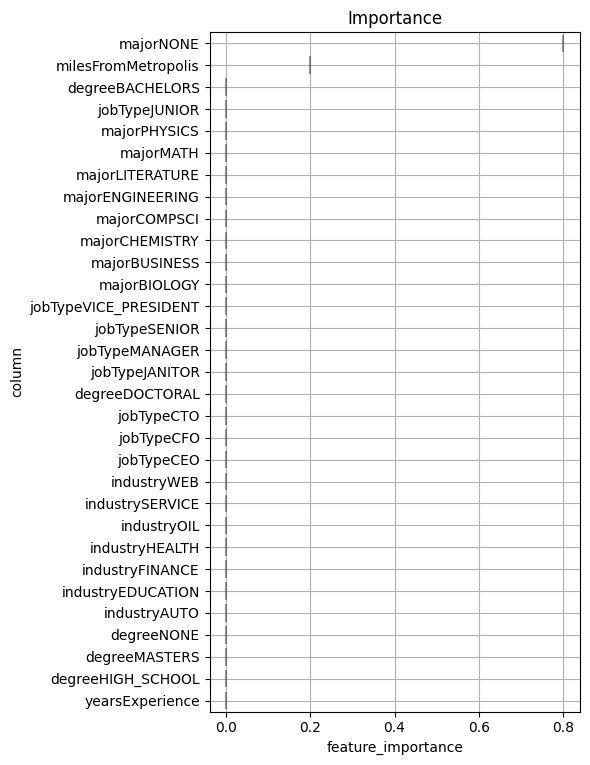

In [83]:
%%time
# Fit a Decision Tree Regressor model to the train dataset
from sklearn.tree import DecisionTreeRegressor
# Instantiate the model

DTR = DecisionTreeRegressor(splitter= 'random', min_weight_fraction_leaf= 0.1, min_samples_leaf = 0.2, max_features= None, max_depth =  5)

# Fit the model to the data

DTR.fit(X_train[:50000], Y_train[:50000])

# print score of the model
print(print_score(DTR))


# visualizing the inportance of features.
fig, ax = visualize_importance(DTR.feature_importances_, train_X[:50000])




### XGBoost Regressor

RMSE-Train: 19.030658147367664
RMSE-Test: 19.05898301705453
Score-Train: 0.7556867842000615
Score-Test: 0.7556684451170824
MedAE-Train: 13.44100570678711
MedAE-Test: 13.468833923339844
MeanAE-Train: 15.437109393808239
MeanAE-Test: 15.461854173856166 

None
CPU times: user 19.9 s, sys: 127 ms, total: 20 s
Wall time: 12.6 s


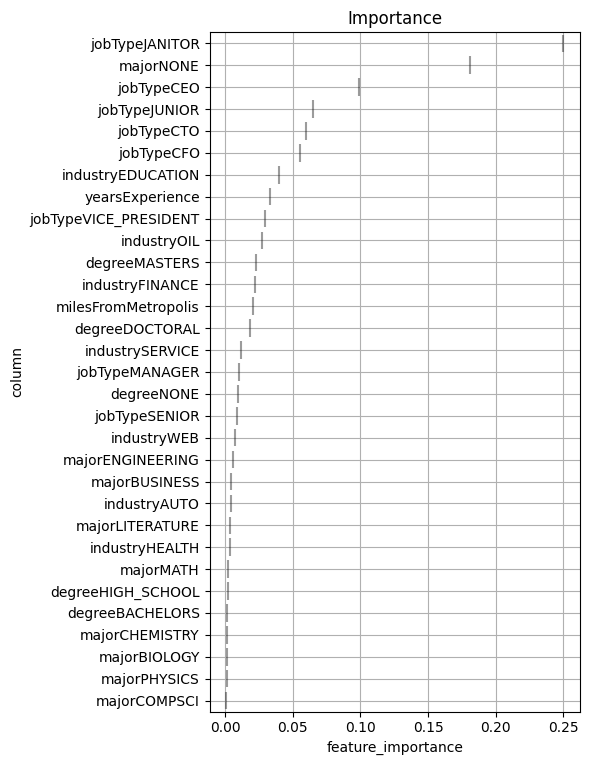

In [84]:
%%time
# Fit a XGB Regressor model to the train dataset
from xgboost import XGBRegressor
# Instantiate the model

xgbr = XGBRegressor(min_child_weight= 3, max_depth = 5, learning_rate = 0.15, gamma = 0.1, colsample_bytree = 0.4)


# Fit the model to the data

xgbr.fit(X_train[:50000], Y_train[:50000])

# print score of the model
print(print_score(xgbr))


# visualizing the inportance of features.
fig, ax = visualize_importance(xgbr.feature_importances_, train_X[:50000])


## Comparing the metrics for tuned models

In [85]:
models= [DTR, rf,GBR, xgbr]
names = ['Dtree', 'Forest','GBR', 'Xboost']
comp_model_train,comp_model_test = compare_models(models,names,X_train,Y_train,X_test,Y_test)


In [86]:
print("Metrics on train data")
comp_model_train

Metrics on train data


Metric      Dtree     Forest        GBR     Xboost
0       rmse  35.110454  30.138222  19.145753  19.030658
1      MedAE  24.444478  20.584994  13.472910  13.441006
2        MAE  28.252010  24.128107  15.519997  15.437109
3  R-squared  -3.858381  -0.571395   0.673478   0.670006

### Now working with the test dataset provided

In [87]:
# test data
test_X = test_data
test_X

jobType       degree    major industry  yearsExperience  \
0              MANAGER  HIGH_SCHOOL     NONE   HEALTH               22   
1               JUNIOR         NONE     NONE     AUTO               20   
2                  CTO      MASTERS  BIOLOGY   HEALTH               17   
3              MANAGER  HIGH_SCHOOL     NONE      OIL               14   
4               JUNIOR     DOCTORAL  BIOLOGY      OIL               10   
...                ...          ...      ...      ...              ...   
999995  VICE_PRESIDENT    BACHELORS     MATH      OIL               14   
999996         MANAGER         NONE     NONE   HEALTH               20   
999997         JANITOR         NONE     NONE      OIL                1   
999998             CTO     DOCTORAL     MATH      OIL               14   
999999          JUNIOR         NONE     NONE      OIL               16   

        milesFromMetropolis  
0                        73  
1                        47  
2                         9  
3                        96  
4                        44  
...                     ...  
999995                    3  
999996                   67  
999997                   91  
999998                   63  
999999                   31  

[1000000 rows x 6 columns]

In [88]:
# passing test data for scaling
col_test = ['yearsExperience','milesFromMetropolis']
test_X = scale_data(test_X, col_test)



In [89]:
test_X.head()

jobType       degree    major industry  yearsExperience  \
0  MANAGER  HIGH_SCHOOL     NONE   HEALTH         0.916667   
1   JUNIOR         NONE     NONE     AUTO         0.833333   
2      CTO      MASTERS  BIOLOGY   HEALTH         0.708333   
3  MANAGER  HIGH_SCHOOL     NONE      OIL         0.583333   
4   JUNIOR     DOCTORAL  BIOLOGY      OIL         0.416667   

   milesFromMetropolis  
0             0.737374  
1             0.474747  
2             0.090909  
3             0.969697  
4             0.444444

In [90]:
# passing test dataset for one hot encoding process
encoder = OneHotEncoder()
test_drop = test_X.drop(['jobType','degree','major', 'industry'], axis=1)
test_X = encoder.fit_transform(test_X.drop(['yearsExperience', 'milesFromMetropolis'], axis=1))

test_X = test_X.join(test_drop['milesFromMetropolis'])
test_X = test_X.join(test_drop['yearsExperience'])


test_X.head()


jobTypeCEO  jobTypeCFO  jobTypeCTO  jobTypeJANITOR  jobTypeJUNIOR  \
0         0.0         0.0         0.0             0.0            0.0   
1         0.0         0.0         0.0             0.0            1.0   
2         0.0         0.0         1.0             0.0            0.0   
3         0.0         0.0         0.0             0.0            0.0   
4         0.0         0.0         0.0             0.0            1.0   

   jobTypeMANAGER  jobTypeSENIOR  jobTypeVICE_PRESIDENT  degreeBACHELORS  \
0             1.0            0.0                    0.0              0.0   
1             0.0            0.0                    0.0              0.0   
2             0.0            0.0                    0.0              0.0   
3             1.0            0.0                    0.0              0.0   
4             0.0            0.0                    0.0              0.0   

   degreeDOCTORAL  ...  majorPHYSICS  industryAUTO  industryEDUCATION  \
0             0.0  ...           0.0           0.0                0.0   
1             0.0  ...           0.0           1.0                0.0   
2             0.0  ...           0.0           0.0                0.0   
3             0.0  ...           0.0           0.0                0.0   
4             1.0  ...           0.0           0.0                0.0   

   industryFINANCE  industryHEALTH  industryOIL  industrySERVICE  industryWEB  \
0              0.0             1.0          0.0              0.0          0.0   
1              0.0             0.0          0.0              0.0          0.0   
2              0.0             1.0          0.0              0.0          0.0   
3              0.0             0.0          1.0              0.0          0.0   
4              0.0             0.0          1.0              0.0          0.0   

   milesFromMetropolis  yearsExperience  
0             0.737374         0.916667  
1             0.474747         0.833333  
2             0.090909         0.708333  
3             0.969697         0.583333  
4             0.444444         0.416667  

[5 rows x 31 columns]

In [91]:
# Perforn the prediction on the test dataset
y_predicted = GBR.predict(test_X)

y_predicted




array([109.88790397,  91.5937969 , 175.69810143, ...,  54.50897684,
       160.41959799, 110.60284023])

In [92]:
# print((X_train.columns))  #colomns order should be same in Test data as Train data
# print((test_X.columns))

In [93]:
# creating a dataframe of predicted results
predictions = pd.DataFrame(y_predicted)



In [94]:
# predicted values in dataframe
predictions



0
0       109.887904
1        91.593797
2       175.698101
3       107.315642
4       112.847383
...            ...
999995  171.833112
999996  104.514981
999997   54.508977
999998  160.419598
999999  110.602840

[1000000 rows x 1 columns]

**Business Problem:**

In [95]:
### we take same samples provided my the manager so that we can explain him the difference between the salary the person should be getting as the salary the person
sample = train_data.sample(100)

sample


jobType       degree        major   industry  yearsExperience  \
604618      CTO    BACHELORS      BIOLOGY    FINANCE         0.500000   
496346   JUNIOR     DOCTORAL     BUSINESS        WEB         0.458333   
274835      CEO         NONE         NONE    FINANCE         0.666667   
704278   SENIOR    BACHELORS     BUSINESS        OIL         0.875000   
289938   JUNIOR     DOCTORAL         MATH       AUTO         0.958333   
...         ...          ...          ...        ...              ...   
894993   JUNIOR      MASTERS      PHYSICS  EDUCATION         1.000000   
44807       CEO    BACHELORS  ENGINEERING    SERVICE         0.958333   
779554   SENIOR     DOCTORAL     BUSINESS    FINANCE         0.958333   
312651  MANAGER  HIGH_SCHOOL         NONE    SERVICE         0.875000   
547298  MANAGER  HIGH_SCHOOL         NONE    FINANCE         0.125000   

        milesFromMetropolis  salary  
604618             0.404040     131  
496346             0.909091      90  
274835             0.929293     165  
704278             0.868687     161  
289938             0.808081      79  
...                     ...     ...  
894993             1.000000      81  
44807              0.959596     108  
779554             0.737374     173  
312651             0.626263      91  
547298             0.898990      88  

[100 rows x 7 columns]

In [96]:
train_cat = sample.iloc[:,0:4]   #categorical variables for sample

#encodind the samples
encoder = OneHotEncoder()
train_X = encoder.fit_transform(train_cat)

# #processing the sample data
train = train_X.join(sample.iloc[:,4:])

#taking those samples whose salary is very less i.e the reason for employee resigning
sample = train[train['salary'] < 60]


sample

jobTypeCEO  jobTypeCFO  jobTypeCTO  jobTypeJANITOR  jobTypeJUNIOR  \
86022          0.0         0.0         0.0             1.0            0.0   
313778         0.0         0.0         0.0             0.0            0.0   
889312         0.0         0.0         0.0             0.0            0.0   
929387         0.0         0.0         0.0             0.0            1.0   
467102         0.0         0.0         0.0             1.0            0.0   

        jobTypeMANAGER  jobTypeSENIOR  jobTypeVICE_PRESIDENT  degreeBACHELORS  \
86022              0.0            0.0                    0.0              0.0   
313778             0.0            1.0                    0.0              0.0   
889312             0.0            1.0                    0.0              0.0   
929387             0.0            0.0                    0.0              0.0   
467102             0.0            0.0                    0.0              0.0   

        degreeDOCTORAL  ...  industryAUTO  industryEDUCATION  industryFINANCE  \
86022              0.0  ...           1.0                0.0              0.0   
313778             0.0  ...           0.0                1.0              0.0   
889312             0.0  ...           0.0                0.0              0.0   
929387             0.0  ...           0.0                0.0              0.0   
467102             0.0  ...           1.0                0.0              0.0   

        industryHEALTH  industryOIL  industrySERVICE  industryWEB  \
86022              0.0          0.0              0.0          0.0   
313778             0.0          0.0              0.0          0.0   
889312             0.0          0.0              0.0          1.0   
929387             0.0          0.0              1.0          0.0   
467102             0.0          0.0              0.0          0.0   

        yearsExperience  milesFromMetropolis  salary  
86022          0.083333             0.424242      35  
313778         0.416667             0.959596      43  
889312         0.000000             0.393939      52  
929387         0.166667             0.404040      51  
467102         0.000000             0.111111      42  

[5 rows x 32 columns]

In [97]:
#Preparing the x and y values
x_sample = sample.drop('salary', axis=1)
y_sample = sample['salary']


# passing test data for scaling
col_test = ['yearsExperience', 'milesFromMetropolis']
sample_x = scale_data(x_sample, col_test)

sample_x_ = sample_x.drop('yearsExperience', axis=1)

sample_x = sample_x_.join(sample_x['yearsExperience'])

In [98]:
sample_x

jobTypeCEO  jobTypeCFO  jobTypeCTO  jobTypeJANITOR  jobTypeJUNIOR  \
86022          0.0         0.0         0.0             1.0            0.0   
313778         0.0         0.0         0.0             0.0            0.0   
889312         0.0         0.0         0.0             0.0            0.0   
929387         0.0         0.0         0.0             0.0            1.0   
467102         0.0         0.0         0.0             1.0            0.0   

        jobTypeMANAGER  jobTypeSENIOR  jobTypeVICE_PRESIDENT  degreeBACHELORS  \
86022              0.0            0.0                    0.0              0.0   
313778             0.0            1.0                    0.0              0.0   
889312             0.0            1.0                    0.0              0.0   
929387             0.0            0.0                    0.0              0.0   
467102             0.0            0.0                    0.0              0.0   

        degreeDOCTORAL  ...  majorPHYSICS  industryAUTO  industryEDUCATION  \
86022              0.0  ...           0.0           1.0                0.0   
313778             0.0  ...           0.0           0.0                1.0   
889312             0.0  ...           0.0           0.0                0.0   
929387             0.0  ...           0.0           0.0                0.0   
467102             0.0  ...           0.0           1.0                0.0   

        industryFINANCE  industryHEALTH  industryOIL  industrySERVICE  \
86022               0.0             0.0          0.0              0.0   
313778              0.0             0.0          0.0              0.0   
889312              0.0             0.0          0.0              0.0   
929387              0.0             0.0          0.0              1.0   
467102              0.0             0.0          0.0              0.0   

        industryWEB  milesFromMetropolis  yearsExperience  
86022           0.0             0.369048              0.2  
313778          0.0             1.000000              1.0  
889312          1.0             0.333333              0.0  
929387          0.0             0.345238              0.4  
467102          0.0             0.000000              0.0  

[5 rows x 31 columns]

In [99]:
len(sample_x.columns)

31

In [100]:
#predicting the sample
predicted_out = GBR.predict(sample_x)

predicted_out

array([55.92689966, 69.00759596, 70.98422971, 79.07457711, 47.0225692 ])

In [101]:
#predicting the sample
predicted_out_xgbr = xgbr.predict(sample_x)

predicted_out_xgbr

array([55.33008 , 69.47027 , 73.96483 , 77.23349 , 53.122185],
      dtype=float32)

In [102]:
y_sample  #Real values

86022     35
313778    43
889312    52
929387    51
467102    42
Name: salary, dtype: int64

In [103]:

import pickle
pickle.dump(GBR, open('GBR_model.pkl', 'wb'))
pickle.dump(xgbr, open('xgbr_model.pkl', 'wb'))

### As we can see the difference in values.

**Example**: The last sample the real value is 58 but the model predicted it to be 74...This may be because the other competitors are offering him more as compared to the current salary..so he is leaving the company.

**Here, we can clearly see a difference between the real salary given to the employee and the predicted salary which may be the probable reason for the employee to leave the company**

## **`Insights`**:

- ### Mr.Francis provides these following insignts to Mr. Andrew after working on the dataset provided:

**1.Major employee of your company are not happy with the salary they are being provided..even if they have the required skills to do the job as compared to other competitors.**

**2.The employee living in the metro cities are satisfied with the salaries they are receiving...but employee's living far from the city are not getting a satisfactory salary which is the most probable reason for them leaving the company.**

    


## **`solution`**:

1. Either increase the salary of these employee's(if they have the required degree and major)

2. Provide accomodation to people living in places far from city so that they are satisfied.

3. provide appraisal or some token of appreciation to such employee's

Note: take all the necessary steps to make the employee more loyal to the company

## **`QUESTION`**:

**Mr. Pandey provides the detail of a new hired employee and asks us to predict a range of salary which the company can offer to that employee:**

**job_type** = CTO

**degree** = Masters

**major** = Biology

**industry** = Health

**experience** = 17

miles from **metropolis** = 9

In [105]:
#predicted_out_tt = GBR.predict('CTO', 'MASTERS', 'BIOLOGY','HEALTH',9,17)
import pickle
model_path = '/content/GBR_model.pkl'
with open(model_path, 'rb') as model:
  loded_model = pickle.load(model)
to_pred = (business_probelm('CTO', 'MASTERS','BIOLOGY', 'HEALTH', 9, 17))
loded_model.predict([to_pred])

array([139.92234293])

In [104]:
def business_probelm(job_type, degree, major, industry, miles, experience):
  CEO,CFO,CTO,JANITOR,JUNIOR, MANAGER, SENIOR,VICE_PRECIDENT = 0,0,0,0,0,0,0,0
  if job_type == 'CEO':
    CEO=1
  elif job_type =='CFO':
    CFO=1
  elif job_type=='CTO':
    CTO = 1
  elif job_type == 'JANITOR':
    JANITOR = 1
  elif job_type =='JUNIOR':
    JUNIOR ==1
  elif job_type =='MANAGER':
    MANAGER =1
  elif job_type == 'SENIOR':
    SENIOR = 1
  elif job_type == 'VICE_PRECIDENT':
    VICE_PRECIDENI = 1
  else:
    print('choose from above options')

  BACHELORS, DOCTORAL, HIGHSCHOOL,MASTERS, NONE = 0,0,0,0,0
  if degree == 'BACHELORS':
    BACHELORS = 1
  elif degree == 'DOCTORAL':
    DOCTORAL =1
  elif degree == 'HIGHSCHOOL':
    HIGHSCHOOL =1
  elif degree == 'MASTERS':
    MASTERS = 1
  elif degree == 'NONE':
    NONE = 1
  else:
    print('choose from above options')


  BIOLOGY, BUSINESS, CHEMISTRY, COMPSCI, ENGINEERING, LITARATURE, MATH, NONE, PHYSICS = 0,0,0,0,0,0,0,0,0
  if major == 'BIOLOGY':
    BIOLOGY=1
  elif major =='BUSINESS':
    BUSINESS=1
  elif major=='CHEMISTRY':
    CHEMISTRY = 1
  elif major == 'COMPSCI':
    COMPSCI = 1
  elif major =='ENGINEERING':
    ENGINEERING ==1
  elif major =='LITARATURE':
    LITARATURE =1
  elif major == 'MATH':
    MATH = 1
  elif major == 'NONE':
    NONE = 1
  elif major == 'PHYSICS':
    PHYSICS = 1
  else:
    print('choose from above options')


  AUTO, EDUCATION, FINANCE, HEALTH, OIL, SERVICE, WEB = 0,0,0,0,0,0,0
  if industry == 'AUTO':
    AUTO=1
  elif industry =='EDUCATION':
    EDUCATION=1
  elif industry=='FINANCE':
    FINANCE = 1
  elif industry == 'HEALTH':
    HEALTH = 1
  elif industry =='OIL':
    OIL ==1
  elif industry =='SERVICE':
    SERVICE =1
  elif industry == 'WEB':
    WEB = 1
  else:
    print('choose from above options')

  miles = int(miles)
  experience = int(experience)

  return CEO,CFO,CTO,JANITOR,JUNIOR, MANAGER, SENIOR,VICE_PRECIDENT, BACHELORS, DOCTORAL, HIGHSCHOOL,MASTERS, NONE, BIOLOGY, BUSINESS, CHEMISTRY, COMPSCI, ENGINEERING, LITARATURE, MATH, NONE, PHYSICS, AUTO, EDUCATION, FINANCE, HEALTH, OIL, SERVICE, WEB, miles, experience



## **`SOLUTION`**:

We will fit in these data points into the model and suppose the model provide us the answer as 180

In this case we will basically provide the Manager with a range of salaries i.e

We can offer him a salary range of 175-190 dollars

## **`CONCLUSION`**:
According to this model, the predicted value we got,
matches with the actual target values. Does the model is performing well.
Even though we use only 50000 samples, the model may perform much better when trained on complete dataset.
We have performed EDA, preprocessing, buid different models, visualized feature importance, did hyper parameter tunning of each model and did prediction.

## Congratulation for completing the assignment.
You have learned a lot while doing this assignment.